# Use engineered features to train a model
This code will use the features created to train a decision trees model.
The process is:
1. Run a decision tree model and compare it to a logistic regression model

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import re
from sklearn.metrics import roc_auc_score as auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import and combine prices files
path = "C:\\Users\\Robert\\Documents\\python_scripts\\stock_trading_ml_modelling\\historical_prices\\"
df_ft = pd.read_hdf(path + "all_hist_prices_w_ft_eng2.h5")
print("SHAPE: {}".format(df_ft.shape))
print(df_ft.dtypes)
df_ft.head()

SHAPE: (283189, 60)
ticker                                      object
date                                datetime64[ns]
open                                       float64
close                                      float64
high                                       float64
low                                        float64
volume                                     float64
change_price                               float64
per_change_price                           float64
close_shift1                               float64
change_close_shift1                        float64
vol_shift1                                 float64
change_vol_shift1                          float64
ema26_shift1                               float64
change_ema26_shift1                        float64
close_13_norm                              float64
close_26_norm                              float64
close_52_norm                              float64
macd_line_13_norm                          float64
macd_line_2

,ticker,date,open,close,high,low,volume,change_price,per_change_price,close_shift1,...,prev_min_signal_line_date_change,max_change_signal_line_neg_val,min_change_signal_line_pos_val,prev_max_macd_line,prev_min_macd_line,prev_max_macd_line_date_change,prev_min_macd_line_date_change,max_change_macd_line_neg_val,min_change_macd_line_pos_val,signal
0,SMT,2017-01-02,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN,...,NaN,0.5,0.5,NaN,NaN,NaN,NaN,0.5,0.5,hold
1,SMT,2017-01-09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,...,NaN,0.5,0.5,NaN,NaN,NaN,NaN,0.5,0.5,hold
2,SMT,2017-01-16,1.000000,0.696774,1.000000,1.000000,0.318512,0.000000,0.000000,1.000000,...,NaN,0.5,0.5,NaN,NaN,NaN,NaN,0.5,0.5,hold
3,SMT,2017-01-23,0.683962,0.858065,0.766497,0.032442,0.284810,0.481675,0.470826,0.696774,...,NaN,0.5,0.5,NaN,NaN,NaN,NaN,0.5,0.5,hold
4,SMT,2017-01-30,0.948113,0.974194,0.868020,1.000000,0.944421,0.282723,0.273722,0.858065,...,NaN,0.5,0.5,NaN,NaN,NaN,NaN,0.5,0.5,hold


In [4]:
df_ft.columns

Index(['ticker', 'date', 'open', 'close', 'high', 'low', 'volume',
       'change_price', 'per_change_price', 'close_shift1',
       'change_close_shift1', 'vol_shift1', 'change_vol_shift1',
       'ema26_shift1', 'change_ema26_shift1', 'close_13_norm', 'close_26_norm',
       'close_52_norm', 'macd_line_13_norm', 'macd_line_26_norm',
       'macd_line_52_norm', 'macd_pos_val', 'macd_neg_val',
       'signal_line_pos_val', 'signal_line_neg_val', 'change_price_pos_val',
       'change_price_neg_val', 'per_change_price_pos_val',
       'per_change_price_neg_val', 'prev_max_close', 'prev_min_close',
       'prev_max_close_date_change', 'prev_min_close_date_change',
       'max_change_close_neg_val', 'min_change_close_pos_val', 'prev_max_macd',
       'prev_min_macd', 'prev_max_macd_date_change',
       'prev_min_macd_date_change', 'max_change_macd_neg_val',
       'min_change_macd_pos_val', 'prev_max_ema26', 'prev_min_ema26',
       'prev_max_ema26_date_change', 'prev_min_ema26_date_chang

# Build the decision tree model
This model is designed to predict if a week should be buy, hold or sell.


In [5]:
#Import the modules
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc

C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
feature_cols = [
    #NORMALISED COLS
    #Standard features
    "open"
    ,"close"
    ,"high"
    ,"low"
    ,"volume"
    ,"change_price"
    ,"per_change_price"
    #Shifted features
    ,"close_shift1"
    ,"change_close_shift1"
    ,"vol_shift1"
    ,"change_vol_shift1"
    ,"ema26_shift1"
    ,"change_ema26_shift1"
    #change to periodic max mins
    ,"close_13_norm"
    ,"close_26_norm"
    ,"close_52_norm"
    ,"macd_line_13_norm"
    ,"macd_line_26_norm"
    ,"macd_line_52_norm"
    #Pos neg features
    ,"macd_pos_val"
    ,"macd_neg_val"
    ,"signal_line_pos_val"
    ,"signal_line_neg_val"
    ,"change_price_pos_val"
    ,"change_price_neg_val"
    ,"per_change_price_pos_val"
    ,"per_change_price_neg_val" 
]
#Append additional columns for key areas
for col in ['close','macd','ema26','signal_line','macd_line']:
    #Prev max/min features
    feature_cols.append("prev_max_{}".format(col))
    feature_cols.append("prev_min_{}".format(col))
    #date changes
    feature_cols.append("prev_max_{}_date_change".format(col))
    feature_cols.append("prev_min_{}_date_change".format(col))
    #Min max change features
    feature_cols.append("max_change_{}_pos_val".format(col))
    feature_cols.append("max_change_{}_neg_val".format(col))
    feature_cols.append("min_change_{}_pos_val".format(col))
    feature_cols.append("min_change_{}_neg_val".format(col))
cat_cols = [
    'signal'
]
df_model = df_ft[feature_cols+cat_cols].copy()
print("COLUMNS:",df_model.columns)
print("COLUMNS:",df_model.dtypes)
print("SHAPE:",df_model.shape)

KeyError: "['max_change_macd_line_pos_val', 'min_change_macd_line_neg_val', 'min_change_ema26_neg_val', 'max_change_macd_pos_val', 'max_change_signal_line_pos_val', 'min_change_signal_line_neg_val', 'max_change_ema26_pos_val', 'min_change_macd_neg_val', 'min_change_close_neg_val', 'max_change_close_pos_val'] not in index"

In [ ]:
#Remove rows with missing or infinate values
df_model.dropna(inplace=True)
df_model.reset_index(inplace=True)
print("COLUMNS:",df_model.columns)
print("SHAPE:",df_model.shape)

In [ ]:
#Shuffle the dataset
np.random.seed(0)
rand_index = np.random.permutation(df_model.index.values)
df_model_rand = df_model.iloc[rand_index]
df_model_rand.index.values

In [ ]:
#Create the train and test dataset
ind_lim = int(np.round(len(df_model_rand.index)*0.7))
print("ind_lim: {}".format(ind_lim))

df_train = df_model_rand.iloc[:ind_lim].reset_index()
df_test = df_model_rand.iloc[ind_lim:].reset_index()

print("train len: {}".format(len(df_train)))
print("test len: {}".format(len(df_test)))

In [9]:
#Function for building a model and outputting a dictionary of models created
def build_models(unique_classes,df_train,features):
    #Create a dictionary of models
    models = {}
    for cl in unique_classes:
        lm = lr() #create the model
        x_train = df_train[features]
        y_train = df_train["signal"] == cl
        lm.fit(x_train,y_train)
        models[cl] = lm
    return models

#Function for creating a dataframe with model probabilities and the most likely outcome
def calc_probs_df(models,unique_classes,df_test,features):
    modelled_probs = pd.DataFrame(columns=unique_classes)
    for cl in unique_classes:
        x_test = df_test[features]
        modelled_probs[cl] = models[cl].predict_proba(x_test)[:,1] 
        #Column index 1 as predict_proba outputs 2 columns,
            #the first is the probability that it is a negative result
            #the second is the probability that it is a positive result
            #that's why we want column index 1, we are looking at the positive result
    #Determine the most probable result
    modelled_probs["signal"] = modelled_probs.idxmax(axis=1)
    modelled_probs["signal_prob"] = modelled_probs[unique_classes].max(axis=1)
#     modelled_probs["bs_bool"] = (modelled_probs["buy"] >= 1/3) | (modelled_probs["sell"] >= 1/3)
#     modelled_probs.loc[modelled_probs["bs_bool"],"signal"] = modelled_probs[["buy","sell"]].idxmax(axis=1)
#     modelled_probs.loc[modelled_probs["bs_bool"],"signal_prob"] = modelled_probs[["buy","sell"]].max(axis=1)
#     print(modelled_probs)
    for cl in unique_classes:
        print(cl,"count:",str(len(modelled_probs.loc[modelled_probs["signal"] == cl,:])))
    return modelled_probs[["signal","signal_prob"]]

#Function to calculate the True Positive Rate for each classifier
def calc_tpr(pred_signal_s,real_signal_s,features,unique_classes):
    tpr_li = []
    for cl in unique_classes:
        true_pos = ((real_signal_s == cl) & (pred_signal_s == cl)).sum()
        false_pos = ((real_signal_s != cl) & (pred_signal_s == cl)).sum()
        true_neg = ((real_signal_s != cl) & (pred_signal_s != cl)).sum()
        false_neg = ((real_signal_s == cl) & (pred_signal_s != cl)).sum()
        #Calc tpr
        if sum([true_pos,false_neg]) != 0:
            tpr = true_pos / sum([true_pos,false_neg])
        else:
            tpr = 0
        #calc fpr
        if sum([true_pos,false_neg]) != 0:
            fpr = false_pos / sum([false_pos,true_neg])
        else:
            fpr = 0
        #calc accuracy
        if sum([true_pos,false_pos,true_neg,false_neg]) != 0:
            acc = sum([true_pos,true_neg])/sum([true_pos,false_pos,true_neg,false_neg])
        else:
            acc = 0
        if sum([true_pos,false_pos]) != 0:
            ppv = true_pos/sum([true_pos,false_pos])
        else:
            ppv = 0
        if sum([true_neg,false_neg]) != 0:
            npv = true_neg/sum([true_neg,false_neg])
        else:
            npv = 0
        #Calc the auc
        bool_pred_s = pred_signal_s == cl
        bool_real_s = real_signal_s == cl
        auc = auc_score(bool_real_s,bool_pred_s)
        tpr_li.append({
            "features":features.copy()
            ,"feature_count":len(features)
            ,"signal":cl
            ,"true_pos":true_pos
            ,"false_pos":false_pos
            ,"true_neg":true_neg
            ,"false_neg":false_neg
            ,"tpr":tpr
            ,"fpr":fpr
            ,"acc":acc
            ,"ppv":ppv
            ,"npv":npv
            ,"auc":auc
        })
        print('{} -> true_pos:{:.4f}, false_pos:{:.4f}, acc:{:.4f},ppv:{:.4f},npv:{:.4f},auc:{:.4f}'.format(cl,true_pos,false_pos,acc,ppv,npv,auc))
    tpr_df = pd.DataFrame(tpr_li,columns=["features","feature_count","signal","true_pos","false_pos","true_neg","false_neg","tpr","fpr","acc","ppv","npv","auc"])
    return tpr_df

# Create a base level model
For "buy", "sell" and "hold" test what the accuracy is if all signals are positive.

In [10]:
#Buy model
unique_classes = df_model_rand["signal"].unique()
calc_tpr(np.full((1,df_test.shape[0]),"buy")[0],df_test["signal"],["ALL BUY"],unique_classes)

hold -> true_pos:0.0000, false_pos:0.0000, acc:0.4182,ppv:0.0000,npv:0.4182,auc:0.5000
sell -> true_pos:0.0000, false_pos:0.0000, acc:0.6649,ppv:0.0000,npv:0.6649,auc:0.5000
buy -> true_pos:5075.0000, false_pos:55988.0000, acc:0.0831,ppv:0.0831,npv:0.0000,auc:0.5000


,features,feature_count,signal,true_pos,false_pos,true_neg,false_neg,tpr,fpr,acc,ppv,npv,auc
0,[ALL BUY],1,hold,0,0,25537,35526,0.0,0.0,0.418207,0.000000,0.418207,0.5
1,[ALL BUY],1,sell,0,0,40601,20462,0.0,0.0,0.664903,0.000000,0.664903,0.5
2,[ALL BUY],1,buy,5075,55988,0,0,1.0,1.0,0.083111,0.083111,0.000000,0.5


In [11]:
#Sell model
calc_tpr(np.full((1,df_test.shape[0]),"sell")[0],df_test["signal"],["ALL SELL"],unique_classes)

hold -> true_pos:0.0000, false_pos:0.0000, acc:0.4182,ppv:0.0000,npv:0.4182,auc:0.5000
sell -> true_pos:20462.0000, false_pos:40601.0000, acc:0.3351,ppv:0.3351,npv:0.0000,auc:0.5000
buy -> true_pos:0.0000, false_pos:0.0000, acc:0.9169,ppv:0.0000,npv:0.9169,auc:0.5000


,features,feature_count,signal,true_pos,false_pos,true_neg,false_neg,tpr,fpr,acc,ppv,npv,auc
0,[ALL SELL],1,hold,0,0,25537,35526,0.0,0.0,0.418207,0.000000,0.418207,0.5
1,[ALL SELL],1,sell,20462,40601,0,0,1.0,1.0,0.335097,0.335097,0.000000,0.5
2,[ALL SELL],1,buy,0,0,55988,5075,0.0,0.0,0.916889,0.000000,0.916889,0.5


In [12]:
#Buy model
calc_tpr(np.full((1,df_test.shape[0]),"hold")[0],df_test["signal"],["ALL HOLD"],unique_classes)

hold -> true_pos:35526.0000, false_pos:25537.0000, acc:0.5818,ppv:0.5818,npv:0.0000,auc:0.5000
sell -> true_pos:0.0000, false_pos:0.0000, acc:0.6649,ppv:0.0000,npv:0.6649,auc:0.5000
buy -> true_pos:0.0000, false_pos:0.0000, acc:0.9169,ppv:0.0000,npv:0.9169,auc:0.5000


,features,feature_count,signal,true_pos,false_pos,true_neg,false_neg,tpr,fpr,acc,ppv,npv,auc
0,[ALL HOLD],1,hold,35526,25537,0,0,1.0,1.0,0.581793,0.581793,0.000000,0.5
1,[ALL HOLD],1,sell,0,0,40601,20462,0.0,0.0,0.664903,0.000000,0.664903,0.5
2,[ALL HOLD],1,buy,0,0,55988,5075,0.0,0.0,0.916889,0.000000,0.916889,0.5


# Creating a multi-classification model - Decision tree
The model will take a one-vs-all approach (IE 1 if it is this value, 0 if it is anything else) using the variables of "buy", "hold", and "sell" individually and building a model to find the error rate on each one.

Error rate is determined by the four classifications:
- True positive - correct - model is 1, actual is 1
- True negative - correct - model is 0, actual is 0
- False positive - error - model is 1, actual is 0
- False negative - error - model is 0, actual is 1

In [13]:
dt_mod = dtc()
dt_mod.fit(df_train[feature_cols],df_train[cat_cols])
pred_signal = dt_mod.predict(df_test[feature_cols])
calc_tpr(pred_signal,df_test['signal'],['ALL'],df_test['signal'].unique())

sell -> true_pos:10871.0000, false_pos:9562.0000, acc:0.6863,ppv:0.5320,npv:0.7639,auc:0.6479
hold -> true_pos:26174.0000, false_pos:9255.0000, acc:0.6953,ppv:0.7388,npv:0.6352,auc:0.6872
buy -> true_pos:2061.0000, false_pos:3140.0000, acc:0.8992,ppv:0.3963,npv:0.9460,auc:0.6750


,features,feature_count,signal,true_pos,false_pos,true_neg,false_neg,tpr,fpr,acc,ppv,npv,auc
0,[ALL],1,sell,10871,9562,31039,9591,0.531277,0.235511,0.686340,0.532032,0.763943,0.647883
1,[ALL],1,hold,26174,9255,16282,9352,0.736756,0.362415,0.695282,0.738773,0.635172,0.687170
2,[ALL],1,buy,2061,3140,52848,3014,0.406108,0.056083,0.899219,0.396270,0.946046,0.675012


In [14]:
#Experiment with min_samples_split

In [15]:
#Experiment with max_depth


# Creating a multi-classification model - Random forest
The model will take a one-vs-all approach (IE 1 if it is this value, 0 if it is anything else) using the variables of "buy", "hold", and "sell" individually and building a model to find the error rate on each one.

In [16]:
rf_mod = rfc()
rf_mod.fit(df_train[feature_cols],df_train[cat_cols])
pred_signal = rf_mod.predict(df_test[feature_cols])
calc_tpr(pred_signal,df_test['signal'],['ALL'],df_test['signal'].unique())

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


sell -> true_pos:10855.0000, false_pos:5303.0000, acc:0.7558,ppv:0.6718,npv:0.7861,auc:0.6999
hold -> true_pos:30997.0000, false_pos:10000.0000, acc:0.7621,ppv:0.7561,npv:0.7743,auc:0.7405
buy -> true_pos:2159.0000, false_pos:1749.0000, acc:0.9236,ppv:0.5525,npv:0.9490,auc:0.6971


,features,feature_count,signal,true_pos,false_pos,true_neg,false_neg,tpr,fpr,acc,ppv,npv,auc
0,[ALL],1,sell,10855,5303,35298,9607,0.530496,0.130613,0.755826,0.671803,0.786059,0.699942
1,[ALL],1,hold,30997,10000,15537,4529,0.872516,0.391589,0.762065,0.756080,0.774295,0.740464
2,[ALL],1,buy,2159,1749,54239,2916,0.425419,0.031239,0.923603,0.552456,0.948981,0.697090


In [17]:
#Experiment with min_samples_split
rf_min_sample_lim_df = pd.DataFrame([])
for i in range(2,100):
    print('\nRUN min_samples_split={}'.format(i))
    rf_mod = rfc(min_samples_split=i)
    rf_mod.fit(df_train[feature_cols],df_train[cat_cols])
    print('RUN ON TEST DF')
    pred_signal = rf_mod.predict(df_test[feature_cols])
    rf_min_sample_lim_df = rf_min_sample_lim_df.append(calc_tpr(pred_signal,df_test['signal'],{'min_samples_split':i,'train_test':'test'},df_test['signal'].unique()))
    print('RUN ON TRAIN DF')
    pred_signal = rf_mod.predict(df_train[feature_cols])
    rf_min_sample_lim_df = rf_min_sample_lim_df.append(calc_tpr(pred_signal,df_train['signal'],{'min_samples_split':i,'train_test':'train'},df_train['signal'].unique()))
    rf_min_sample_lim_df


RUN min_samples_split=2


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10848.0000, false_pos:5307.0000, acc:0.7556,ppv:0.6715,npv:0.7859,auc:0.6997
hold -> true_pos:30988.0000, false_pos:10051.0000, acc:0.7611,ppv:0.7551,npv:0.7734,auc:0.7393
buy -> true_pos:2132.0000, false_pos:1737.0000, acc:0.9234,ppv:0.5510,npv:0.9485,auc:0.6945
RUN ON TRAIN DF
hold -> true_pos:82893.0000, false_pos:1358.0000, acc:0.9892,ppv:0.9839,npv:0.9969,auc:0.9875
sell -> true_pos:46352.0000, false_pos:219.0000, acc:0.9891,ppv:0.9953,npv:0.9861,auc:0.9849
buy -> true_pos:11545.0000, false_pos:114.0000, acc:0.9979,ppv:0.9902,npv:0.9986,auc:0.9919

RUN min_samples_split=3


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11122.0000, false_pos:5437.0000, acc:0.7580,ppv:0.6717,npv:0.7901,auc:0.7048
hold -> true_pos:30864.0000, false_pos:9769.0000, acc:0.7637,ppv:0.7596,npv:0.7718,auc:0.7431
buy -> true_pos:2145.0000, false_pos:1726.0000, acc:0.9238,ppv:0.5541,npv:0.9488,auc:0.6959
RUN ON TRAIN DF
hold -> true_pos:82806.0000, false_pos:1421.0000, acc:0.9881,ppv:0.9831,npv:0.9954,auc:0.9864
sell -> true_pos:46321.0000, false_pos:381.0000, acc:0.9878,ppv:0.9918,npv:0.9858,auc:0.9837
buy -> true_pos:11418.0000, false_pos:134.0000, acc:0.9969,ppv:0.9884,npv:0.9977,auc:0.9864

RUN min_samples_split=4


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11538.0000, false_pos:5883.0000, acc:0.7575,ppv:0.6623,npv:0.7955,auc:0.7095
hold -> true_pos:30557.0000, false_pos:9426.0000, acc:0.7643,ppv:0.7642,npv:0.7643,auc:0.7455
buy -> true_pos:2070.0000, false_pos:1589.0000, acc:0.9248,ppv:0.5657,npv:0.9477,auc:0.6898
RUN ON TRAIN DF
hold -> true_pos:82641.0000, false_pos:1594.0000, acc:0.9858,ppv:0.9811,npv:0.9926,auc:0.9840
sell -> true_pos:46231.0000, false_pos:603.0000, acc:0.9856,ppv:0.9871,npv:0.9848,auc:0.9816
buy -> true_pos:11268.0000, false_pos:144.0000, acc:0.9958,ppv:0.9874,npv:0.9965,auc:0.9800

RUN min_samples_split=5


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11697.0000, false_pos:5973.0000, acc:0.7586,ppv:0.6620,npv:0.7980,auc:0.7123
hold -> true_pos:30533.0000, false_pos:9381.0000, acc:0.7646,ppv:0.7650,npv:0.7639,auc:0.7461
buy -> true_pos:1989.0000, false_pos:1490.0000, acc:0.9251,ppv:0.5717,npv:0.9464,auc:0.6827
RUN ON TRAIN DF
hold -> true_pos:82490.0000, false_pos:1865.0000, acc:0.9828,ppv:0.9779,npv:0.9900,auc:0.9808
sell -> true_pos:46057.0000, false_pos:849.0000, acc:0.9826,ppv:0.9819,npv:0.9830,auc:0.9785
buy -> true_pos:11031.0000, false_pos:189.0000, acc:0.9938,ppv:0.9832,npv:0.9947,auc:0.9697

RUN min_samples_split=6


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11705.0000, false_pos:6231.0000, acc:0.7545,ppv:0.6526,npv:0.7969,auc:0.7093
hold -> true_pos:30402.0000, false_pos:9343.0000, acc:0.7631,ppv:0.7649,npv:0.7596,auc:0.7450
buy -> true_pos:1932.0000, false_pos:1450.0000, acc:0.9248,ppv:0.5713,npv:0.9455,auc:0.6774
RUN ON TRAIN DF
hold -> true_pos:82371.0000, false_pos:2305.0000, acc:0.9789,ppv:0.9728,npv:0.9878,auc:0.9764
sell -> true_pos:45683.0000, false_pos:1058.0000, acc:0.9785,ppv:0.9774,npv:0.9791,auc:0.9734
buy -> true_pos:10838.0000, false_pos:226.0000, acc:0.9922,ppv:0.9796,npv:0.9933,auc:0.9614

RUN min_samples_split=7


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11803.0000, false_pos:6137.0000, acc:0.7577,ppv:0.6579,npv:0.7992,auc:0.7128
hold -> true_pos:30435.0000, false_pos:9244.0000, acc:0.7652,ppv:0.7670,npv:0.7619,auc:0.7474
buy -> true_pos:1969.0000, false_pos:1475.0000, acc:0.9250,ppv:0.5717,npv:0.9461,auc:0.6808
RUN ON TRAIN DF
hold -> true_pos:82210.0000, false_pos:2691.0000, acc:0.9750,ppv:0.9683,npv:0.9850,auc:0.9722
sell -> true_pos:45378.0000, false_pos:1265.0000, acc:0.9749,ppv:0.9729,npv:0.9759,auc:0.9692
buy -> true_pos:10697.0000, false_pos:240.0000, acc:0.9911,ppv:0.9781,npv:0.9922,auc:0.9553

RUN min_samples_split=8


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11759.0000, false_pos:6290.0000, acc:0.7545,ppv:0.6515,npv:0.7977,auc:0.7099
hold -> true_pos:30331.0000, false_pos:9358.0000, acc:0.7617,ppv:0.7642,npv:0.7569,auc:0.7437
buy -> true_pos:1895.0000, false_pos:1430.0000, acc:0.9245,ppv:0.5699,npv:0.9449,auc:0.6739
RUN ON TRAIN DF
hold -> true_pos:82053.0000, false_pos:3184.0000, acc:0.9705,ppv:0.9626,npv:0.9822,auc:0.9671
sell -> true_pos:44986.0000, false_pos:1541.0000, acc:0.9703,ppv:0.9669,npv:0.9719,auc:0.9636
buy -> true_pos:10420.0000, false_pos:297.0000, acc:0.9888,ppv:0.9723,npv:0.9901,auc:0.9433

RUN min_samples_split=9


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11874.0000, false_pos:6187.0000, acc:0.7580,ppv:0.6574,npv:0.8003,auc:0.7140
hold -> true_pos:30429.0000, false_pos:9251.0000, acc:0.7650,ppv:0.7669,npv:0.7616,auc:0.7471
buy -> true_pos:1939.0000, false_pos:1383.0000, acc:0.9260,ppv:0.5837,npv:0.9457,auc:0.6787
RUN ON TRAIN DF
hold -> true_pos:81861.0000, false_pos:3640.0000, acc:0.9659,ppv:0.9574,npv:0.9787,auc:0.9621
sell -> true_pos:44585.0000, false_pos:1903.0000, acc:0.9649,ppv:0.9591,npv:0.9677,auc:0.9575
buy -> true_pos:10140.0000, false_pos:352.0000, acc:0.9864,ppv:0.9665,npv:0.9880,auc:0.9311

RUN min_samples_split=10


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11802.0000, false_pos:6407.0000, acc:0.7533,ppv:0.6481,npv:0.7979,auc:0.7095
hold -> true_pos:30286.0000, false_pos:9300.0000, acc:0.7619,ppv:0.7651,npv:0.7560,auc:0.7442
buy -> true_pos:1883.0000, false_pos:1385.0000, acc:0.9250,ppv:0.5762,npv:0.9448,auc:0.6731
RUN ON TRAIN DF
hold -> true_pos:81657.0000, false_pos:4160.0000, acc:0.9609,ppv:0.9515,npv:0.9750,auc:0.9565
sell -> true_pos:44167.0000, false_pos:2084.0000, acc:0.9607,ppv:0.9549,npv:0.9635,auc:0.9521
buy -> true_pos:9982.0000, false_pos:431.0000, acc:0.9847,ppv:0.9586,npv:0.9868,auc:0.9241

RUN min_samples_split=11


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11677.0000, false_pos:6327.0000, acc:0.7525,ppv:0.6486,npv:0.7960,auc:0.7074
hold -> true_pos:30337.0000, false_pos:9321.0000, acc:0.7624,ppv:0.7650,npv:0.7576,auc:0.7445
buy -> true_pos:1905.0000, false_pos:1496.0000, acc:0.9236,ppv:0.5601,npv:0.9450,auc:0.6743
RUN ON TRAIN DF
hold -> true_pos:81417.0000, false_pos:4581.0000, acc:0.9562,ppv:0.9467,npv:0.9707,auc:0.9515
sell -> true_pos:43742.0000, false_pos:2416.0000, acc:0.9554,ppv:0.9477,npv:0.9591,auc:0.9459
buy -> true_pos:9835.0000, false_pos:490.0000, acc:0.9833,ppv:0.9525,npv:0.9857,auc:0.9176

RUN min_samples_split=12


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11763.0000, false_pos:6454.0000, acc:0.7518,ppv:0.6457,npv:0.7970,auc:0.7080
hold -> true_pos:30262.0000, false_pos:9278.0000, acc:0.7619,ppv:0.7654,npv:0.7554,auc:0.7443
buy -> true_pos:1885.0000, false_pos:1421.0000, acc:0.9245,ppv:0.5702,npv:0.9448,auc:0.6730
RUN ON TRAIN DF
hold -> true_pos:81281.0000, false_pos:5182.0000, acc:0.9510,ppv:0.9401,npv:0.9680,auc:0.9456
sell -> true_pos:43318.0000, false_pos:2696.0000, acc:0.9504,ppv:0.9414,npv:0.9548,auc:0.9400
buy -> true_pos:9467.0000, false_pos:537.0000, acc:0.9804,ppv:0.9463,npv:0.9830,auc:0.9017

RUN min_samples_split=13


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11768.0000, false_pos:6083.0000, acc:0.7580,ppv:0.6592,npv:0.7988,auc:0.7126
hold -> true_pos:30537.0000, false_pos:9356.0000, acc:0.7651,ppv:0.7655,npv:0.7643,auc:0.7466
buy -> true_pos:1884.0000, false_pos:1435.0000, acc:0.9242,ppv:0.5676,npv:0.9447,auc:0.6728
RUN ON TRAIN DF
hold -> true_pos:81207.0000, false_pos:5572.0000, acc:0.9478,ppv:0.9358,npv:0.9665,auc:0.9419
sell -> true_pos:42936.0000, false_pos:2847.0000, acc:0.9467,ppv:0.9378,npv:0.9509,auc:0.9352
buy -> true_pos:9348.0000, false_pos:571.0000, acc:0.9793,ppv:0.9424,npv:0.9821,auc:0.8965

RUN min_samples_split=14


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11776.0000, false_pos:6311.0000, acc:0.7544,ppv:0.6511,npv:0.7979,auc:0.7100
hold -> true_pos:30438.0000, false_pos:9387.0000, acc:0.7629,ppv:0.7643,npv:0.7604,auc:0.7446
buy -> true_pos:1799.0000, false_pos:1352.0000, acc:0.9242,ppv:0.5709,npv:0.9434,auc:0.6652
RUN ON TRAIN DF
hold -> true_pos:80994.0000, false_pos:5911.0000, acc:0.9439,ppv:0.9320,npv:0.9626,auc:0.9377
sell -> true_pos:42669.0000, false_pos:3188.0000, acc:0.9424,ppv:0.9305,npv:0.9481,auc:0.9306
buy -> true_pos:9084.0000, false_pos:635.0000, acc:0.9770,ppv:0.9347,npv:0.9801,auc:0.8850

RUN min_samples_split=15


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11661.0000, false_pos:6316.0000, acc:0.7524,ppv:0.6487,npv:0.7957,auc:0.7072
hold -> true_pos:30421.0000, false_pos:9425.0000, acc:0.7620,ppv:0.7635,npv:0.7594,auc:0.7436
buy -> true_pos:1867.0000, false_pos:1373.0000, acc:0.9250,ppv:0.5762,npv:0.9445,auc:0.6717
RUN ON TRAIN DF
hold -> true_pos:80798.0000, false_pos:6455.0000, acc:0.9387,ppv:0.9260,npv:0.9588,auc:0.9320
sell -> true_pos:42132.0000, false_pos:3457.0000, acc:0.9368,ppv:0.9242,npv:0.9427,auc:0.9236
buy -> true_pos:8946.0000, false_pos:693.0000, acc:0.9756,ppv:0.9281,npv:0.9791,auc:0.8789

RUN min_samples_split=16


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11742.0000, false_pos:6263.0000, acc:0.7546,ppv:0.6522,npv:0.7975,auc:0.7098
hold -> true_pos:30462.0000, false_pos:9411.0000, acc:0.7629,ppv:0.7640,npv:0.7610,auc:0.7445
buy -> true_pos:1840.0000, false_pos:1345.0000, acc:0.9250,ppv:0.5777,npv:0.9441,auc:0.6693
RUN ON TRAIN DF
hold -> true_pos:80763.0000, false_pos:6783.0000, acc:0.9362,ppv:0.9225,npv:0.9579,auc:0.9290
sell -> true_pos:41916.0000, false_pos:3535.0000, acc:0.9347,ppv:0.9222,npv:0.9406,auc:0.9209
buy -> true_pos:8778.0000, false_pos:706.0000, acc:0.9744,ppv:0.9256,npv:0.9778,auc:0.8717

RUN min_samples_split=17


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11557.0000, false_pos:6208.0000, acc:0.7525,ppv:0.6505,npv:0.7943,auc:0.7060
hold -> true_pos:30497.0000, false_pos:9536.0000, acc:0.7615,ppv:0.7618,npv:0.7609,auc:0.7425
buy -> true_pos:1880.0000, false_pos:1385.0000, acc:0.9250,ppv:0.5758,npv:0.9447,auc:0.6729
RUN ON TRAIN DF
hold -> true_pos:80497.0000, false_pos:7316.0000, acc:0.9306,ppv:0.9167,npv:0.9529,auc:0.9229
sell -> true_pos:41389.0000, false_pos:3831.0000, acc:0.9289,ppv:0.9153,npv:0.9353,auc:0.9138
buy -> true_pos:8615.0000, false_pos:833.0000, acc:0.9723,ppv:0.9118,npv:0.9766,auc:0.8642

RUN min_samples_split=18


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11748.0000, false_pos:6257.0000, acc:0.7548,ppv:0.6525,npv:0.7976,auc:0.7100
hold -> true_pos:30471.0000, false_pos:9425.0000, acc:0.7629,ppv:0.7638,npv:0.7612,auc:0.7443
buy -> true_pos:1842.0000, false_pos:1320.0000, acc:0.9254,ppv:0.5825,npv:0.9442,auc:0.6697
RUN ON TRAIN DF
hold -> true_pos:80341.0000, false_pos:7741.0000, acc:0.9265,ppv:0.9121,npv:0.9498,auc:0.9184
sell -> true_pos:41043.0000, false_pos:4124.0000, acc:0.9245,ppv:0.9087,npv:0.9318,auc:0.9086
buy -> true_pos:8397.0000, false_pos:835.0000, acc:0.9708,ppv:0.9096,npv:0.9750,auc:0.8549

RUN min_samples_split=19


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11589.0000, false_pos:6326.0000, acc:0.7511,ppv:0.6469,npv:0.7944,auc:0.7053
hold -> true_pos:30380.0000, false_pos:9522.0000, acc:0.7598,ppv:0.7614,npv:0.7568,auc:0.7411
buy -> true_pos:1819.0000, false_pos:1427.0000, acc:0.9233,ppv:0.5604,npv:0.9437,auc:0.6665
RUN ON TRAIN DF
hold -> true_pos:80097.0000, false_pos:8054.0000, acc:0.9226,ppv:0.9086,npv:0.9452,auc:0.9143
sell -> true_pos:40779.0000, false_pos:4398.0000, acc:0.9207,ppv:0.9026,npv:0.9290,auc:0.9044
buy -> true_pos:8207.0000, false_pos:946.0000, acc:0.9687,ppv:0.8966,npv:0.9736,auc:0.8464

RUN min_samples_split=20


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11692.0000, false_pos:6231.0000, acc:0.7543,ppv:0.6523,npv:0.7967,auc:0.7090
hold -> true_pos:30496.0000, false_pos:9525.0000, acc:0.7616,ppv:0.7620,npv:0.7610,auc:0.7427
buy -> true_pos:1825.0000, false_pos:1294.0000, acc:0.9256,ppv:0.5851,npv:0.9439,auc:0.6682
RUN ON TRAIN DF
hold -> true_pos:79872.0000, false_pos:8718.0000, acc:0.9163,ppv:0.9016,npv:0.9406,auc:0.9074
sell -> true_pos:40221.0000, false_pos:4668.0000, acc:0.9149,ppv:0.8960,npv:0.9235,auc:0.8971
buy -> true_pos:8054.0000, false_pos:948.0000, acc:0.9676,ppv:0.8947,npv:0.9725,auc:0.8399

RUN min_samples_split=21


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11608.0000, false_pos:6312.0000, acc:0.7516,ppv:0.6478,npv:0.7948,auc:0.7059
hold -> true_pos:30371.0000, false_pos:9493.0000, acc:0.7601,ppv:0.7619,npv:0.7568,auc:0.7416
buy -> true_pos:1877.0000, false_pos:1402.0000, acc:0.9247,ppv:0.5724,npv:0.9447,auc:0.6724
RUN ON TRAIN DF
hold -> true_pos:79930.0000, false_pos:8965.0000, acc:0.9150,ppv:0.8992,npv:0.9413,auc:0.9056
sell -> true_pos:39919.0000, false_pos:4704.0000, acc:0.9125,ppv:0.8946,npv:0.9207,auc:0.8938
buy -> true_pos:8057.0000, false_pos:906.0000, acc:0.9679,ppv:0.8989,npv:0.9725,auc:0.8401

RUN min_samples_split=22


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11507.0000, false_pos:6269.0000, acc:0.7507,ppv:0.6473,npv:0.7931,auc:0.7040
hold -> true_pos:30540.0000, false_pos:9641.0000, acc:0.7605,ppv:0.7601,npv:0.7612,auc:0.7411
buy -> true_pos:1812.0000, false_pos:1294.0000, acc:0.9254,ppv:0.5834,npv:0.9437,auc:0.6670
RUN ON TRAIN DF
hold -> true_pos:79835.0000, false_pos:9327.0000, acc:0.9118,ppv:0.8954,npv:0.9393,auc:0.9020
sell -> true_pos:39635.0000, false_pos:4874.0000, acc:0.9093,ppv:0.8905,npv:0.9179,auc:0.8899
buy -> true_pos:7823.0000, false_pos:987.0000, acc:0.9657,ppv:0.8880,npv:0.9708,auc:0.8299

RUN min_samples_split=23


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11515.0000, false_pos:6232.0000, acc:0.7514,ppv:0.6488,npv:0.7934,auc:0.7046
hold -> true_pos:30473.0000, false_pos:9681.0000, acc:0.7587,ppv:0.7589,npv:0.7583,auc:0.7393
buy -> true_pos:1825.0000, false_pos:1337.0000, acc:0.9249,ppv:0.5772,npv:0.9439,auc:0.6679
RUN ON TRAIN DF
hold -> true_pos:79530.0000, false_pos:9564.0000, acc:0.9080,ppv:0.8927,npv:0.9336,auc:0.8982
sell -> true_pos:39408.0000, false_pos:5206.0000, acc:0.9054,ppv:0.8833,npv:0.9154,auc:0.8858
buy -> true_pos:7729.0000, false_pos:1044.0000, acc:0.9646,ppv:0.8810,npv:0.9701,auc:0.8256

RUN min_samples_split=24


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11528.0000, false_pos:6239.0000, acc:0.7515,ppv:0.6488,npv:0.7937,auc:0.7049
hold -> true_pos:30495.0000, false_pos:9653.0000, acc:0.7595,ppv:0.7596,npv:0.7595,auc:0.7402
buy -> true_pos:1833.0000, false_pos:1315.0000, acc:0.9254,ppv:0.5823,npv:0.9440,auc:0.6688
RUN ON TRAIN DF
hold -> true_pos:79461.0000, false_pos:9953.0000, acc:0.9048,ppv:0.8887,npv:0.9319,auc:0.8945
sell -> true_pos:38975.0000, false_pos:5272.0000, acc:0.9019,ppv:0.8809,npv:0.9114,auc:0.8809
buy -> true_pos:7661.0000, false_pos:1159.0000, acc:0.9633,ppv:0.8686,npv:0.9696,auc:0.8223

RUN min_samples_split=25


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11515.0000, false_pos:6372.0000, acc:0.7491,ppv:0.6438,npv:0.7928,auc:0.7029
hold -> true_pos:30479.0000, false_pos:9693.0000, acc:0.7586,ppv:0.7587,npv:0.7584,auc:0.7392
buy -> true_pos:1701.0000, false_pos:1303.0000, acc:0.9234,ppv:0.5662,npv:0.9419,auc:0.6559
RUN ON TRAIN DF
hold -> true_pos:79221.0000, false_pos:10388.0000, acc:0.9000,ppv:0.8841,npv:0.9271,auc:0.8894
sell -> true_pos:38675.0000, false_pos:5693.0000, acc:0.8968,ppv:0.8717,npv:0.9082,auc:0.8755
buy -> true_pos:7361.0000, false_pos:1143.0000, acc:0.9614,ppv:0.8656,npv:0.9674,auc:0.8096

RUN min_samples_split=26


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11557.0000, false_pos:6361.0000, acc:0.7500,ppv:0.6450,npv:0.7936,auc:0.7041
hold -> true_pos:30434.0000, false_pos:9656.0000, acc:0.7585,ppv:0.7591,npv:0.7572,auc:0.7393
buy -> true_pos:1737.0000, false_pos:1318.0000, acc:0.9238,ppv:0.5686,npv:0.9425,auc:0.6594
RUN ON TRAIN DF
hold -> true_pos:79025.0000, false_pos:10679.0000, acc:0.8966,ppv:0.8810,npv:0.9233,auc:0.8858
sell -> true_pos:38416.0000, false_pos:5924.0000, acc:0.8934,ppv:0.8664,npv:0.9056,auc:0.8716
buy -> true_pos:7291.0000, false_pos:1146.0000, acc:0.9608,ppv:0.8642,npv:0.9669,auc:0.8066

RUN min_samples_split=27


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11445.0000, false_pos:6218.0000, acc:0.7505,ppv:0.6480,npv:0.7922,auc:0.7031
hold -> true_pos:30519.0000, false_pos:9730.0000, acc:0.7587,ppv:0.7583,npv:0.7594,auc:0.7390
buy -> true_pos:1798.0000, false_pos:1353.0000, acc:0.9242,ppv:0.5706,npv:0.9434,auc:0.6651
RUN ON TRAIN DF
hold -> true_pos:78979.0000, false_pos:10827.0000, acc:0.8953,ppv:0.8794,npv:0.9223,auc:0.8842
sell -> true_pos:38185.0000, false_pos:5959.0000, acc:0.8915,ppv:0.8650,npv:0.9034,auc:0.8690
buy -> true_pos:7265.0000, false_pos:1266.0000, acc:0.9598,ppv:0.8516,npv:0.9667,auc:0.8050

RUN min_samples_split=28


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11525.0000, false_pos:6280.0000, acc:0.7508,ppv:0.6473,npv:0.7934,auc:0.7043
hold -> true_pos:30456.0000, false_pos:9689.0000, acc:0.7583,ppv:0.7586,npv:0.7576,auc:0.7389
buy -> true_pos:1799.0000, false_pos:1314.0000, acc:0.9248,ppv:0.5779,npv:0.9435,auc:0.6655
RUN ON TRAIN DF
hold -> true_pos:78991.0000, false_pos:11156.0000, acc:0.8930,ppv:0.8762,npv:0.9220,auc:0.8815
sell -> true_pos:37906.0000, false_pos:6066.0000, acc:0.8888,ppv:0.8620,npv:0.9008,auc:0.8655
buy -> true_pos:7106.0000, false_pos:1256.0000, acc:0.9588,ppv:0.8498,npv:0.9656,auc:0.7983

RUN min_samples_split=29


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11444.0000, false_pos:6258.0000, acc:0.7498,ppv:0.6465,npv:0.7920,auc:0.7026
hold -> true_pos:30478.0000, false_pos:9703.0000, acc:0.7584,ppv:0.7585,npv:0.7583,auc:0.7390
buy -> true_pos:1795.0000, false_pos:1385.0000, acc:0.9236,ppv:0.5645,npv:0.9433,auc:0.6645
RUN ON TRAIN DF
hold -> true_pos:78783.0000, false_pos:11322.0000, acc:0.8904,ppv:0.8743,npv:0.9181,auc:0.8789
sell -> true_pos:37699.0000, false_pos:6213.0000, acc:0.8863,ppv:0.8585,npv:0.8987,auc:0.8625
buy -> true_pos:7099.0000, false_pos:1365.0000, acc:0.9580,ppv:0.8387,npv:0.9655,auc:0.7975

RUN min_samples_split=30


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11481.0000, false_pos:6218.0000, acc:0.7511,ppv:0.6487,npv:0.7929,auc:0.7040
hold -> true_pos:30526.0000, false_pos:9723.0000, acc:0.7589,ppv:0.7584,npv:0.7598,auc:0.7393
buy -> true_pos:1773.0000, false_pos:1342.0000, acc:0.9239,ppv:0.5692,npv:0.9430,auc:0.6627
RUN ON TRAIN DF
hold -> true_pos:78550.0000, false_pos:11829.0000, acc:0.8852,ppv:0.8691,npv:0.9132,auc:0.8732
sell -> true_pos:37275.0000, false_pos:6581.0000, acc:0.8808,ppv:0.8499,npv:0.8945,auc:0.8562
buy -> true_pos:6883.0000, false_pos:1363.0000, acc:0.9565,ppv:0.8347,npv:0.9639,auc:0.7883

RUN min_samples_split=31


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11432.0000, false_pos:6209.0000, acc:0.7504,ppv:0.6480,npv:0.7920,auc:0.7029
hold -> true_pos:30551.0000, false_pos:9763.0000, acc:0.7586,ppv:0.7578,npv:0.7602,auc:0.7388
buy -> true_pos:1761.0000, false_pos:1347.0000, acc:0.9237,ppv:0.5666,npv:0.9428,auc:0.6615
RUN ON TRAIN DF
hold -> true_pos:78582.0000, false_pos:11910.0000, acc:0.8849,ppv:0.8684,npv:0.9136,auc:0.8727
sell -> true_pos:37241.0000, false_pos:6484.0000, acc:0.8812,ppv:0.8517,npv:0.8943,auc:0.8563
buy -> true_pos:6843.0000, false_pos:1421.0000, acc:0.9558,ppv:0.8280,npv:0.9636,auc:0.7864

RUN min_samples_split=32


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11481.0000, false_pos:6278.0000, acc:0.7501,ppv:0.6465,npv:0.7926,auc:0.7032
hold -> true_pos:30556.0000, false_pos:9681.0000, acc:0.7601,ppv:0.7594,npv:0.7614,auc:0.7405
buy -> true_pos:1745.0000, false_pos:1322.0000, acc:0.9238,ppv:0.5690,npv:0.9426,auc:0.6601
RUN ON TRAIN DF
hold -> true_pos:78547.0000, false_pos:12156.0000, acc:0.8829,ppv:0.8660,npv:0.9126,auc:0.8704
sell -> true_pos:36985.0000, false_pos:6618.0000, acc:0.8785,ppv:0.8482,npv:0.8918,auc:0.8529
buy -> true_pos:6773.0000, false_pos:1402.0000, acc:0.9554,ppv:0.8285,npv:0.9631,auc:0.7835

RUN min_samples_split=33


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11404.0000, false_pos:6337.0000, acc:0.7479,ppv:0.6428,npv:0.7909,auc:0.7006
hold -> true_pos:30476.0000, false_pos:9852.0000, acc:0.7560,ppv:0.7557,npv:0.7565,auc:0.7360
buy -> true_pos:1717.0000, false_pos:1277.0000, acc:0.9241,ppv:0.5735,npv:0.9422,auc:0.6578
RUN ON TRAIN DF
hold -> true_pos:78391.0000, false_pos:12383.0000, acc:0.8802,ppv:0.8636,npv:0.9094,auc:0.8676
sell -> true_pos:36831.0000, false_pos:6857.0000, acc:0.8757,ppv:0.8430,npv:0.8902,auc:0.8500
buy -> true_pos:6611.0000, false_pos:1408.0000, acc:0.9542,ppv:0.8244,npv:0.9620,auc:0.7766

RUN min_samples_split=34


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11348.0000, false_pos:6341.0000, acc:0.7469,ppv:0.6415,npv:0.7899,auc:0.6992
hold -> true_pos:30517.0000, false_pos:9889.0000, acc:0.7560,ppv:0.7553,npv:0.7575,auc:0.7359
buy -> true_pos:1696.0000, false_pos:1272.0000, acc:0.9238,ppv:0.5714,npv:0.9418,auc:0.6557
RUN ON TRAIN DF
hold -> true_pos:78197.0000, false_pos:12801.0000, acc:0.8759,ppv:0.8593,npv:0.9053,auc:0.8629
sell -> true_pos:36423.0000, false_pos:7073.0000, acc:0.8713,ppv:0.8374,npv:0.8862,auc:0.8446
buy -> true_pos:6511.0000, false_pos:1476.0000, acc:0.9531,ppv:0.8152,npv:0.9612,auc:0.7720

RUN min_samples_split=35


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11370.0000, false_pos:6277.0000, acc:0.7483,ppv:0.6443,npv:0.7906,auc:0.7005
hold -> true_pos:30538.0000, false_pos:9880.0000, acc:0.7565,ppv:0.7556,npv:0.7584,auc:0.7364
buy -> true_pos:1696.0000, false_pos:1302.0000, acc:0.9233,ppv:0.5657,npv:0.9418,auc:0.6555
RUN ON TRAIN DF
hold -> true_pos:78126.0000, false_pos:13091.0000, acc:0.8734,ppv:0.8565,npv:0.9035,auc:0.8600
sell -> true_pos:36184.0000, false_pos:7191.0000, acc:0.8688,ppv:0.8342,npv:0.8840,auc:0.8415
buy -> true_pos:6377.0000, false_pos:1512.0000, acc:0.9519,ppv:0.8083,npv:0.9603,auc:0.7662

RUN min_samples_split=36


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11327.0000, false_pos:6186.0000, acc:0.7491,ppv:0.6468,npv:0.7902,auc:0.7006
hold -> true_pos:30557.0000, false_pos:9907.0000, acc:0.7564,ppv:0.7552,npv:0.7588,auc:0.7361
buy -> true_pos:1787.0000, false_pos:1299.0000, acc:0.9249,ppv:0.5791,npv:0.9433,auc:0.6645
RUN ON TRAIN DF
hold -> true_pos:78116.0000, false_pos:13126.0000, acc:0.8731,ppv:0.8561,npv:0.9032,auc:0.8597
sell -> true_pos:36033.0000, false_pos:7127.0000, acc:0.8682,ppv:0.8349,npv:0.8827,auc:0.8402
buy -> true_pos:6487.0000, false_pos:1592.0000, acc:0.9521,ppv:0.8029,npv:0.9610,auc:0.7706

RUN min_samples_split=37


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11412.0000, false_pos:6228.0000, acc:0.7498,ppv:0.6469,npv:0.7916,auc:0.7022
hold -> true_pos:30520.0000, false_pos:9844.0000, acc:0.7568,ppv:0.7561,npv:0.7582,auc:0.7368
buy -> true_pos:1718.0000, false_pos:1341.0000, acc:0.9231,ppv:0.5616,npv:0.9421,auc:0.6573
RUN ON TRAIN DF
hold -> true_pos:77922.0000, false_pos:13521.0000, acc:0.8689,ppv:0.8521,npv:0.8991,auc:0.8552
sell -> true_pos:35641.0000, false_pos:7360.0000, acc:0.8638,ppv:0.8288,npv:0.8790,auc:0.8349
buy -> true_pos:6499.0000, false_pos:1538.0000, acc:0.9525,ppv:0.8086,npv:0.9611,auc:0.7713

RUN min_samples_split=38


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11366.0000, false_pos:6248.0000, acc:0.7487,ppv:0.6453,npv:0.7907,auc:0.7008
hold -> true_pos:30632.0000, false_pos:9881.0000, acc:0.7580,ppv:0.7561,npv:0.7618,auc:0.7377
buy -> true_pos:1667.0000, false_pos:1269.0000, acc:0.9234,ppv:0.5678,npv:0.9414,auc:0.6529
RUN ON TRAIN DF
hold -> true_pos:77872.0000, false_pos:13481.0000, acc:0.8689,ppv:0.8524,npv:0.8983,auc:0.8552
sell -> true_pos:35836.0000, false_pos:7568.0000, acc:0.8637,ppv:0.8256,npv:0.8804,auc:0.8359
buy -> true_pos:6230.0000, false_pos:1494.0000, acc:0.9510,ppv:0.8066,npv:0.9592,auc:0.7600

RUN min_samples_split=39


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11272.0000, false_pos:6089.0000, acc:0.7498,ppv:0.6493,npv:0.7897,auc:0.7005
hold -> true_pos:30605.0000, false_pos:9882.0000, acc:0.7576,ppv:0.7559,npv:0.7608,auc:0.7373
buy -> true_pos:1809.0000, false_pos:1406.0000, acc:0.9235,ppv:0.5627,npv:0.9435,auc:0.6657
RUN ON TRAIN DF
hold -> true_pos:77786.0000, false_pos:13788.0000, acc:0.8661,ppv:0.8494,npv:0.8961,auc:0.8521
sell -> true_pos:35484.0000, false_pos:7452.0000, acc:0.8621,ppv:0.8264,npv:0.8775,auc:0.8328
buy -> true_pos:6325.0000, false_pos:1646.0000, acc:0.9506,ppv:0.7935,npv:0.9599,auc:0.7635

RUN min_samples_split=40


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11220.0000, false_pos:6172.0000, acc:0.7476,ppv:0.6451,npv:0.7884,auc:0.6982
hold -> true_pos:30629.0000, false_pos:10056.0000, acc:0.7551,ppv:0.7528,npv:0.7597,auc:0.7342
buy -> true_pos:1726.0000, false_pos:1260.0000, acc:0.9245,ppv:0.5780,npv:0.9423,auc:0.6588
RUN ON TRAIN DF
hold -> true_pos:77686.0000, false_pos:14247.0000, acc:0.8622,ppv:0.8450,npv:0.8934,auc:0.8477
sell -> true_pos:35007.0000, false_pos:7718.0000, acc:0.8569,ppv:0.8194,npv:0.8729,auc:0.8264
buy -> true_pos:6182.0000, false_pos:1641.0000, acc:0.9496,ppv:0.7902,npv:0.9588,auc:0.7574

RUN min_samples_split=41


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11309.0000, false_pos:6166.0000, acc:0.7491,ppv:0.6472,npv:0.7900,auc:0.7004
hold -> true_pos:30618.0000, false_pos:9936.0000, acc:0.7569,ppv:0.7550,npv:0.7607,auc:0.7364
buy -> true_pos:1711.0000, false_pos:1323.0000, acc:0.9232,ppv:0.5639,npv:0.9420,auc:0.6568
RUN ON TRAIN DF
hold -> true_pos:77684.0000, false_pos:14252.0000, acc:0.8621,ppv:0.8450,npv:0.8934,auc:0.8476
sell -> true_pos:35070.0000, false_pos:7698.0000, acc:0.8574,ppv:0.8200,npv:0.8735,auc:0.8271
buy -> true_pos:6100.0000, false_pos:1677.0000, acc:0.9488,ppv:0.7844,npv:0.9582,auc:0.7537

RUN min_samples_split=42


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11232.0000, false_pos:6276.0000, acc:0.7461,ppv:0.6415,npv:0.7881,auc:0.6972
hold -> true_pos:30485.0000, false_pos:9993.0000, acc:0.7538,ppv:0.7531,npv:0.7551,auc:0.7334
buy -> true_pos:1745.0000, false_pos:1332.0000, acc:0.9237,ppv:0.5671,npv:0.9426,auc:0.6600
RUN ON TRAIN DF
hold -> true_pos:77388.0000, false_pos:14521.0000, acc:0.8582,ppv:0.8420,npv:0.8876,auc:0.8436
sell -> true_pos:34715.0000, false_pos:7983.0000, acc:0.8530,ppv:0.8130,npv:0.8700,auc:0.8219
buy -> true_pos:6122.0000, false_pos:1752.0000, acc:0.9484,ppv:0.7775,npv:0.9584,auc:0.7544

RUN min_samples_split=43


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11172.0000, false_pos:6095.0000, acc:0.7480,ppv:0.6470,npv:0.7879,auc:0.6979
hold -> true_pos:30678.0000, false_pos:10111.0000, acc:0.7550,ppv:0.7521,npv:0.7609,auc:0.7338
buy -> true_pos:1722.0000, false_pos:1285.0000, acc:0.9240,ppv:0.5727,npv:0.9422,auc:0.6582
RUN ON TRAIN DF
hold -> true_pos:77383.0000, false_pos:14855.0000, acc:0.8558,ppv:0.8389,npv:0.8867,auc:0.8407
sell -> true_pos:34455.0000, false_pos:8082.0000, acc:0.8504,ppv:0.8100,npv:0.8676,auc:0.8187
buy -> true_pos:5960.0000, false_pos:1746.0000, acc:0.9473,ppv:0.7734,npv:0.9572,auc:0.7475

RUN min_samples_split=44


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11252.0000, false_pos:6277.0000, acc:0.7464,ppv:0.6419,npv:0.7884,auc:0.6976
hold -> true_pos:30597.0000, false_pos:10010.0000, acc:0.7554,ppv:0.7535,npv:0.7590,auc:0.7346
buy -> true_pos:1689.0000, false_pos:1238.0000, acc:0.9243,ppv:0.5770,npv:0.9418,auc:0.6553
RUN ON TRAIN DF
hold -> true_pos:77250.0000, false_pos:14767.0000, acc:0.8555,ppv:0.8395,npv:0.8846,auc:0.8407
sell -> true_pos:34553.0000, false_pos:8212.0000, acc:0.8502,ppv:0.8080,npv:0.8683,auc:0.8190
buy -> true_pos:5961.0000, false_pos:1738.0000, acc:0.9474,ppv:0.7743,npv:0.9572,auc:0.7476

RUN min_samples_split=45


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11293.0000, false_pos:6327.0000, acc:0.7462,ppv:0.6409,npv:0.7889,auc:0.6980
hold -> true_pos:30516.0000, false_pos:9952.0000, acc:0.7550,ppv:0.7541,npv:0.7567,auc:0.7346
buy -> true_pos:1712.0000, false_pos:1263.0000, acc:0.9242,ppv:0.5755,npv:0.9421,auc:0.6574
RUN ON TRAIN DF
hold -> true_pos:77117.0000, false_pos:14920.0000, acc:0.8535,ppv:0.8379,npv:0.8819,auc:0.8386
sell -> true_pos:34405.0000, false_pos:8396.0000, acc:0.8479,ppv:0.8038,npv:0.8668,auc:0.8165
buy -> true_pos:5918.0000, false_pos:1725.0000, acc:0.9471,ppv:0.7743,npv:0.9569,auc:0.7458

RUN min_samples_split=46


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11253.0000, false_pos:6247.0000, acc:0.7469,ppv:0.6430,npv:0.7886,auc:0.6980
hold -> true_pos:30590.0000, false_pos:9932.0000, acc:0.7565,ppv:0.7549,npv:0.7597,auc:0.7361
buy -> true_pos:1713.0000, false_pos:1328.0000, acc:0.9232,ppv:0.5633,npv:0.9421,auc:0.6569
RUN ON TRAIN DF
hold -> true_pos:77164.0000, false_pos:15133.0000, acc:0.8523,ppv:0.8360,npv:0.8822,auc:0.8371
sell -> true_pos:34199.0000, false_pos:8313.0000, acc:0.8470,ppv:0.8045,npv:0.8651,auc:0.8148
buy -> true_pos:5928.0000, false_pos:1744.0000, acc:0.9471,ppv:0.7727,npv:0.9570,auc:0.7461

RUN min_samples_split=47


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11272.0000, false_pos:6212.0000, acc:0.7478,ppv:0.6447,npv:0.7891,auc:0.6989
hold -> true_pos:30561.0000, false_pos:9971.0000, acc:0.7554,ppv:0.7540,npv:0.7582,auc:0.7349
buy -> true_pos:1722.0000, false_pos:1325.0000, acc:0.9234,ppv:0.5651,npv:0.9422,auc:0.6578
RUN ON TRAIN DF
hold -> true_pos:77240.0000, false_pos:15220.0000, acc:0.8522,ppv:0.8354,npv:0.8834,auc:0.8368
sell -> true_pos:34128.0000, false_pos:8303.0000, acc:0.8466,ppv:0.8043,npv:0.8645,auc:0.8141
buy -> true_pos:5857.0000, false_pos:1733.0000, acc:0.9467,ppv:0.7717,npv:0.9565,auc:0.7432

RUN min_samples_split=48


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11223.0000, false_pos:6191.0000, acc:0.7473,ppv:0.6445,npv:0.7883,auc:0.6980
hold -> true_pos:30649.0000, false_pos:10104.0000, acc:0.7547,ppv:0.7521,npv:0.7599,auc:0.7335
buy -> true_pos:1665.0000, false_pos:1231.0000, acc:0.9240,ppv:0.5749,npv:0.9414,auc:0.6530
RUN ON TRAIN DF
hold -> true_pos:77100.0000, false_pos:15616.0000, acc:0.8485,ppv:0.8316,npv:0.8800,auc:0.8326
sell -> true_pos:33882.0000, false_pos:8460.0000, acc:0.8438,ppv:0.8002,npv:0.8622,auc:0.8107
buy -> true_pos:5740.0000, false_pos:1683.0000, acc:0.9462,ppv:0.7733,npv:0.9557,auc:0.7384

RUN min_samples_split=49


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11285.0000, false_pos:6232.0000, acc:0.7477,ppv:0.6442,npv:0.7893,auc:0.6990
hold -> true_pos:30538.0000, false_pos:9940.0000, acc:0.7555,ppv:0.7544,npv:0.7577,auc:0.7352
buy -> true_pos:1764.0000, false_pos:1304.0000, acc:0.9244,ppv:0.5750,npv:0.9429,auc:0.6621
RUN ON TRAIN DF
hold -> true_pos:76927.0000, false_pos:15723.0000, acc:0.8465,ppv:0.8303,npv:0.8766,auc:0.8307
sell -> true_pos:33604.0000, false_pos:8569.0000, acc:0.8410,ppv:0.7968,npv:0.8596,auc:0.8072
buy -> true_pos:5745.0000, false_pos:1913.0000, acc:0.9446,ppv:0.7502,npv:0.9557,auc:0.7377

RUN min_samples_split=50


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11231.0000, false_pos:6301.0000, acc:0.7456,ppv:0.6406,npv:0.7879,auc:0.6968
hold -> true_pos:30590.0000, false_pos:10054.0000, acc:0.7545,ppv:0.7526,npv:0.7583,auc:0.7337
buy -> true_pos:1671.0000, false_pos:1216.0000, acc:0.9243,ppv:0.5788,npv:0.9415,auc:0.6538
RUN ON TRAIN DF
hold -> true_pos:76944.0000, false_pos:15750.0000, acc:0.8464,ppv:0.8301,npv:0.8769,auc:0.8305
sell -> true_pos:33693.0000, false_pos:8661.0000, acc:0.8410,ppv:0.7955,npv:0.8603,auc:0.8076
buy -> true_pos:5715.0000, false_pos:1718.0000, acc:0.9458,ppv:0.7689,npv:0.9555,auc:0.7372

RUN min_samples_split=51


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11141.0000, false_pos:6284.0000, acc:0.7444,ppv:0.6394,npv:0.7864,auc:0.6948
hold -> true_pos:30570.0000, false_pos:10134.0000, acc:0.7529,ppv:0.7510,npv:0.7566,auc:0.7318
buy -> true_pos:1691.0000, false_pos:1243.0000, acc:0.9242,ppv:0.5763,npv:0.9418,auc:0.6555
RUN ON TRAIN DF
hold -> true_pos:76882.0000, false_pos:16001.0000, acc:0.8442,ppv:0.8277,npv:0.8752,auc:0.8281
sell -> true_pos:33389.0000, false_pos:8768.0000, acc:0.8381,ppv:0.7920,npv:0.8575,auc:0.8039
buy -> true_pos:5654.0000, false_pos:1787.0000, acc:0.9449,ppv:0.7598,npv:0.9551,auc:0.7343

RUN min_samples_split=52


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11163.0000, false_pos:6288.0000, acc:0.7447,ppv:0.6397,npv:0.7868,auc:0.6953
hold -> true_pos:30557.0000, false_pos:10076.0000, acc:0.7536,ppv:0.7520,npv:0.7568,auc:0.7328
buy -> true_pos:1665.0000, false_pos:1314.0000, acc:0.9226,ppv:0.5589,npv:0.9413,auc:0.6523
RUN ON TRAIN DF
hold -> true_pos:76712.0000, false_pos:16087.0000, acc:0.8424,ppv:0.8266,npv:0.8719,auc:0.8263
sell -> true_pos:33378.0000, false_pos:8717.0000, acc:0.8384,ppv:0.7929,npv:0.8575,auc:0.8040
buy -> true_pos:5716.0000, false_pos:1871.0000, acc:0.9447,ppv:0.7534,npv:0.9555,auc:0.7366

RUN min_samples_split=53


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11281.0000, false_pos:6219.0000, acc:0.7478,ppv:0.6446,npv:0.7892,auc:0.6991
hold -> true_pos:30628.0000, false_pos:10018.0000, acc:0.7557,ppv:0.7535,npv:0.7601,auc:0.7349
buy -> true_pos:1676.0000, false_pos:1241.0000, acc:0.9240,ppv:0.5746,npv:0.9415,auc:0.6540
RUN ON TRAIN DF
hold -> true_pos:76706.0000, false_pos:16218.0000, acc:0.8415,ppv:0.8255,npv:0.8715,auc:0.8252
sell -> true_pos:33282.0000, false_pos:8963.0000, acc:0.8360,ppv:0.7878,npv:0.8563,auc:0.8017
buy -> true_pos:5499.0000, false_pos:1813.0000, acc:0.9436,ppv:0.7521,npv:0.9539,auc:0.7276

RUN min_samples_split=54


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11179.0000, false_pos:6329.0000, acc:0.7443,ppv:0.6385,npv:0.7869,auc:0.6952
hold -> true_pos:30539.0000, false_pos:10022.0000, acc:0.7542,ppv:0.7529,npv:0.7568,auc:0.7336
buy -> true_pos:1723.0000, false_pos:1271.0000, acc:0.9243,ppv:0.5755,npv:0.9423,auc:0.6584
RUN ON TRAIN DF
hold -> true_pos:76668.0000, false_pos:16243.0000, acc:0.8410,ppv:0.8252,npv:0.8708,auc:0.8247
sell -> true_pos:33175.0000, false_pos:8950.0000, acc:0.8354,ppv:0.7875,npv:0.8554,auc:0.8007
buy -> true_pos:5634.0000, false_pos:1811.0000, acc:0.9445,ppv:0.7567,npv:0.9549,auc:0.7334

RUN min_samples_split=55


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11174.0000, false_pos:6203.0000, acc:0.7463,ppv:0.6430,npv:0.7874,auc:0.6967
hold -> true_pos:30667.0000, false_pos:10142.0000, acc:0.7543,ppv:0.7515,npv:0.7601,auc:0.7330
buy -> true_pos:1603.0000, false_pos:1274.0000, acc:0.9223,ppv:0.5572,npv:0.9403,auc:0.6466
RUN ON TRAIN DF
hold -> true_pos:76634.0000, false_pos:16418.0000, acc:0.8396,ppv:0.8236,npv:0.8697,auc:0.8231
sell -> true_pos:32858.0000, false_pos:9097.0000, acc:0.8321,ppv:0.7832,npv:0.8525,auc:0.7966
buy -> true_pos:5565.0000, false_pos:1909.0000, acc:0.9434,ppv:0.7446,npv:0.9544,auc:0.7300

RUN min_samples_split=56


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11166.0000, false_pos:6154.0000, acc:0.7470,ppv:0.6447,npv:0.7875,auc:0.6971
hold -> true_pos:30699.0000, false_pos:10110.0000, acc:0.7554,ppv:0.7523,npv:0.7617,auc:0.7341
buy -> true_pos:1664.0000, false_pos:1270.0000, acc:0.9233,ppv:0.5671,npv:0.9413,auc:0.6526
RUN ON TRAIN DF
hold -> true_pos:76659.0000, false_pos:16614.0000, acc:0.8384,ppv:0.8219,npv:0.8696,auc:0.8216
sell -> true_pos:32877.0000, false_pos:9016.0000, acc:0.8328,ppv:0.7848,npv:0.8528,auc:0.7972
buy -> true_pos:5470.0000, false_pos:1845.0000, acc:0.9432,ppv:0.7478,npv:0.9537,auc:0.7262

RUN min_samples_split=57


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11110.0000, false_pos:6249.0000, acc:0.7445,ppv:0.6400,npv:0.7860,auc:0.6945
hold -> true_pos:30553.0000, false_pos:10147.0000, acc:0.7524,ppv:0.7507,npv:0.7558,auc:0.7313
buy -> true_pos:1758.0000, false_pos:1246.0000, acc:0.9253,ppv:0.5852,npv:0.9429,auc:0.6621
RUN ON TRAIN DF
hold -> true_pos:76346.0000, false_pos:16615.0000, acc:0.8362,ppv:0.8213,npv:0.8641,auc:0.8197
sell -> true_pos:32730.0000, false_pos:9172.0000, acc:0.8307,ppv:0.7811,npv:0.8513,auc:0.7948
buy -> true_pos:5665.0000, false_pos:1953.0000, acc:0.9438,ppv:0.7436,npv:0.9551,auc:0.7341

RUN min_samples_split=58


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11087.0000, false_pos:6223.0000, acc:0.7446,ppv:0.6405,npv:0.7857,auc:0.6943
hold -> true_pos:30638.0000, false_pos:10206.0000, acc:0.7528,ppv:0.7501,npv:0.7582,auc:0.7314
buy -> true_pos:1621.0000, false_pos:1288.0000, acc:0.9223,ppv:0.5572,npv:0.9406,auc:0.6482
RUN ON TRAIN DF
hold -> true_pos:76396.0000, false_pos:16940.0000, acc:0.8342,ppv:0.8185,npv:0.8641,auc:0.8172
sell -> true_pos:32540.0000, false_pos:9363.0000, acc:0.8280,ppv:0.7766,npv:0.8494,auc:0.7918
buy -> true_pos:5321.0000, false_pos:1921.0000, acc:0.9416,ppv:0.7347,npv:0.9527,auc:0.7196

RUN min_samples_split=59


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11030.0000, false_pos:6139.0000, acc:0.7450,ppv:0.6424,npv:0.7851,auc:0.6939
hold -> true_pos:30662.0000, false_pos:10265.0000, acc:0.7522,ppv:0.7492,npv:0.7584,auc:0.7306
buy -> true_pos:1698.0000, false_pos:1269.0000, acc:0.9239,ppv:0.5723,npv:0.9419,auc:0.6560
RUN ON TRAIN DF
hold -> true_pos:76270.0000, false_pos:16982.0000, acc:0.8331,ppv:0.8179,npv:0.8618,auc:0.8161
sell -> true_pos:32419.0000, false_pos:9317.0000, acc:0.8275,ppv:0.7768,npv:0.8485,auc:0.7908
buy -> true_pos:5461.0000, false_pos:2032.0000, acc:0.9418,ppv:0.7288,npv:0.9536,auc:0.7251

RUN min_samples_split=60


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11146.0000, false_pos:6154.0000, acc:0.7467,ppv:0.6443,npv:0.7871,auc:0.6966
hold -> true_pos:30724.0000, false_pos:10180.0000, acc:0.7546,ppv:0.7511,npv:0.7618,auc:0.7331
buy -> true_pos:1621.0000, false_pos:1238.0000, acc:0.9232,ppv:0.5670,npv:0.9407,auc:0.6486
RUN ON TRAIN DF
hold -> true_pos:76424.0000, false_pos:17048.0000, acc:0.8337,ppv:0.8176,npv:0.8643,auc:0.8165
sell -> true_pos:32504.0000, false_pos:9286.0000, acc:0.8283,ppv:0.7778,npv:0.8493,auc:0.7919
buy -> true_pos:5327.0000, false_pos:1892.0000, acc:0.9418,ppv:0.7379,npv:0.9527,auc:0.7199

RUN min_samples_split=61


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11042.0000, false_pos:6090.0000, acc:0.7460,ppv:0.6445,npv:0.7856,auc:0.6948
hold -> true_pos:30768.0000, false_pos:10229.0000, acc:0.7546,ppv:0.7505,npv:0.7629,auc:0.7328
buy -> true_pos:1699.0000, false_pos:1235.0000, acc:0.9245,ppv:0.5791,npv:0.9419,auc:0.6564
RUN ON TRAIN DF
hold -> true_pos:76523.0000, false_pos:17275.0000, acc:0.8328,ppv:0.8158,npv:0.8654,auc:0.8152
sell -> true_pos:32152.0000, false_pos:9193.0000, acc:0.8265,ppv:0.7777,npv:0.8464,auc:0.7887
buy -> true_pos:5431.0000, false_pos:1907.0000, acc:0.9424,ppv:0.7401,npv:0.9534,auc:0.7243

RUN min_samples_split=62


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11153.0000, false_pos:6186.0000, acc:0.7462,ppv:0.6432,npv:0.7871,auc:0.6963
hold -> true_pos:30745.0000, false_pos:10180.0000, acc:0.7550,ppv:0.7513,npv:0.7626,auc:0.7334
buy -> true_pos:1583.0000, false_pos:1216.0000, acc:0.9229,ppv:0.5656,npv:0.9401,auc:0.6451
RUN ON TRAIN DF
hold -> true_pos:76339.0000, false_pos:17199.0000, acc:0.8320,ppv:0.8161,npv:0.8624,auc:0.8147
sell -> true_pos:32313.0000, false_pos:9576.0000, acc:0.8249,ppv:0.7714,npv:0.8472,auc:0.7883
buy -> true_pos:5160.0000, false_pos:1894.0000, acc:0.9406,ppv:0.7315,npv:0.9515,auc:0.7128

RUN min_samples_split=63


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11059.0000, false_pos:6125.0000, acc:0.7457,ppv:0.6436,npv:0.7857,auc:0.6948
hold -> true_pos:30693.0000, false_pos:10296.0000, acc:0.7522,ppv:0.7488,npv:0.7592,auc:0.7304
buy -> true_pos:1651.0000, false_pos:1239.0000, acc:0.9236,ppv:0.5713,npv:0.9411,auc:0.6516
RUN ON TRAIN DF
hold -> true_pos:76176.0000, false_pos:17617.0000, acc:0.8279,ppv:0.8122,npv:0.8583,auc:0.8102
sell -> true_pos:31786.0000, false_pos:9596.0000, acc:0.8211,ppv:0.7681,npv:0.8428,auc:0.7827
buy -> true_pos:5259.0000, false_pos:2047.0000, acc:0.9403,ppv:0.7198,npv:0.9522,auc:0.7165

RUN min_samples_split=64


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11099.0000, false_pos:6185.0000, acc:0.7454,ppv:0.6422,npv:0.7861,auc:0.6950
hold -> true_pos:30706.0000, false_pos:10147.0000, acc:0.7549,ppv:0.7516,npv:0.7615,auc:0.7335
buy -> true_pos:1676.0000, false_pos:1250.0000, acc:0.9239,ppv:0.5728,npv:0.9415,auc:0.6540
RUN ON TRAIN DF
hold -> true_pos:76101.0000, false_pos:17533.0000, acc:0.8280,ppv:0.8127,npv:0.8572,auc:0.8105
sell -> true_pos:31980.0000, false_pos:9755.0000, acc:0.8213,ppv:0.7663,npv:0.8441,auc:0.7839
buy -> true_pos:5157.0000, false_pos:1955.0000, acc:0.9402,ppv:0.7251,npv:0.9515,auc:0.7125

RUN min_samples_split=65


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11133.0000, false_pos:6061.0000, acc:0.7480,ppv:0.6475,npv:0.7873,auc:0.6974
hold -> true_pos:30745.0000, false_pos:10244.0000, acc:0.7539,ppv:0.7501,npv:0.7618,auc:0.7321
buy -> true_pos:1657.0000, false_pos:1223.0000, acc:0.9240,ppv:0.5753,npv:0.9413,auc:0.6523
RUN ON TRAIN DF
hold -> true_pos:76206.0000, false_pos:17483.0000, acc:0.8291,ppv:0.8134,npv:0.8592,auc:0.8115
sell -> true_pos:32031.0000, false_pos:9590.0000, acc:0.8228,ppv:0.7696,npv:0.8448,auc:0.7853
buy -> true_pos:5210.0000, false_pos:1961.0000, acc:0.9405,ppv:0.7265,npv:0.9519,auc:0.7147

RUN min_samples_split=66


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10949.0000, false_pos:6146.0000, acc:0.7436,ppv:0.6405,npv:0.7836,auc:0.6919
hold -> true_pos:30696.0000, false_pos:10314.0000, acc:0.7520,ppv:0.7485,npv:0.7591,auc:0.7301
buy -> true_pos:1666.0000, false_pos:1292.0000, acc:0.9230,ppv:0.5632,npv:0.9413,auc:0.6526
RUN ON TRAIN DF
hold -> true_pos:75981.0000, false_pos:17842.0000, acc:0.8250,ppv:0.8098,npv:0.8542,auc:0.8071
sell -> true_pos:31652.0000, false_pos:9668.0000, acc:0.8196,ppv:0.7660,npv:0.8415,auc:0.7809
buy -> true_pos:5271.0000, false_pos:2067.0000, acc:0.9402,ppv:0.7183,npv:0.9523,auc:0.7169

RUN min_samples_split=67


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11071.0000, false_pos:6295.0000, acc:0.7431,ppv:0.6375,npv:0.7851,auc:0.6930
hold -> true_pos:30600.0000, false_pos:10193.0000, acc:0.7524,ppv:0.7501,npv:0.7570,auc:0.7311
buy -> true_pos:1646.0000, false_pos:1258.0000, acc:0.9232,ppv:0.5668,npv:0.9410,auc:0.6509
RUN ON TRAIN DF
hold -> true_pos:75924.0000, false_pos:17765.0000, acc:0.8251,ppv:0.8104,npv:0.8535,auc:0.8074
sell -> true_pos:31769.0000, false_pos:9880.0000, acc:0.8190,ppv:0.7628,npv:0.8422,auc:0.7810
buy -> true_pos:5133.0000, false_pos:2010.0000, acc:0.9396,ppv:0.7186,npv:0.9513,auc:0.7112

RUN min_samples_split=68


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11025.0000, false_pos:6212.0000, acc:0.7437,ppv:0.6396,npv:0.7847,auc:0.6929
hold -> true_pos:30641.0000, false_pos:10315.0000, acc:0.7511,ppv:0.7481,npv:0.7570,auc:0.7293
buy -> true_pos:1667.0000, false_pos:1203.0000, acc:0.9245,ppv:0.5808,npv:0.9414,auc:0.6535
RUN ON TRAIN DF
hold -> true_pos:76025.0000, false_pos:18170.0000, acc:0.8230,ppv:0.8071,npv:0.8540,auc:0.8046
sell -> true_pos:31454.0000, false_pos:9819.0000, acc:0.8172,ppv:0.7621,npv:0.8396,auc:0.7780
buy -> true_pos:5064.0000, false_pos:1949.0000, acc:0.9396,ppv:0.7221,npv:0.9508,auc:0.7085

RUN min_samples_split=69


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11128.0000, false_pos:6393.0000, acc:0.7424,ppv:0.6351,npv:0.7856,auc:0.6932
hold -> true_pos:30503.0000, false_pos:10208.0000, acc:0.7506,ppv:0.7493,npv:0.7532,auc:0.7294
buy -> true_pos:1616.0000, false_pos:1215.0000, acc:0.9235,ppv:0.5708,npv:0.9406,auc:0.6484
RUN ON TRAIN DF
hold -> true_pos:75877.0000, false_pos:18052.0000, acc:0.8228,ppv:0.8078,npv:0.8518,auc:0.8047
sell -> true_pos:31564.0000, false_pos:9991.0000, acc:0.8167,ppv:0.7596,npv:0.8403,auc:0.7783
buy -> true_pos:5029.0000, false_pos:1968.0000, acc:0.9392,ppv:0.7187,npv:0.9506,auc:0.7069

RUN min_samples_split=70


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11072.0000, false_pos:6252.0000, acc:0.7438,ppv:0.6391,npv:0.7853,auc:0.6936
hold -> true_pos:30672.0000, false_pos:10266.0000, acc:0.7524,ppv:0.7492,npv:0.7588,auc:0.7307
buy -> true_pos:1615.0000, false_pos:1186.0000, acc:0.9239,ppv:0.5766,npv:0.9406,auc:0.6485
RUN ON TRAIN DF
hold -> true_pos:75878.0000, false_pos:18010.0000, acc:0.8231,ppv:0.8082,npv:0.8519,auc:0.8051
sell -> true_pos:31615.0000, false_pos:10034.0000, acc:0.8168,ppv:0.7591,npv:0.8406,auc:0.7786
buy -> true_pos:4991.0000, false_pos:1953.0000, acc:0.9390,ppv:0.7188,npv:0.9503,auc:0.7054

RUN min_samples_split=71


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11104.0000, false_pos:6295.0000, acc:0.7437,ppv:0.6382,npv:0.7857,auc:0.6938
hold -> true_pos:30585.0000, false_pos:10235.0000, acc:0.7515,ppv:0.7493,npv:0.7559,auc:0.7301
buy -> true_pos:1625.0000, false_pos:1219.0000, acc:0.9235,ppv:0.5714,npv:0.9407,auc:0.6492
RUN ON TRAIN DF
hold -> true_pos:75644.0000, false_pos:18073.0000, acc:0.8210,ppv:0.8072,npv:0.8476,auc:0.8032
sell -> true_pos:31376.0000, false_pos:10263.0000, acc:0.8135,ppv:0.7535,npv:0.8383,auc:0.7749
buy -> true_pos:5074.0000, false_pos:2051.0000, acc:0.9389,ppv:0.7121,npv:0.9509,auc:0.7086

RUN min_samples_split=72


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11110.0000, false_pos:6237.0000, acc:0.7447,ppv:0.6405,npv:0.7861,auc:0.6947
hold -> true_pos:30626.0000, false_pos:10280.0000, acc:0.7514,ppv:0.7487,npv:0.7569,auc:0.7298
buy -> true_pos:1608.0000, false_pos:1202.0000, acc:0.9235,ppv:0.5722,npv:0.9405,auc:0.6477
RUN ON TRAIN DF
hold -> true_pos:75808.0000, false_pos:18227.0000, acc:0.8211,ppv:0.8062,npv:0.8500,auc:0.8029
sell -> true_pos:31458.0000, false_pos:10099.0000, acc:0.8152,ppv:0.7570,npv:0.8392,auc:0.7766
buy -> true_pos:4927.0000, false_pos:1962.0000, acc:0.9385,ppv:0.7152,npv:0.9499,auc:0.7026

RUN min_samples_split=73


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10980.0000, false_pos:6067.0000, acc:0.7454,ppv:0.6441,npv:0.7846,auc:0.6936
hold -> true_pos:30771.0000, false_pos:10368.0000, acc:0.7523,ppv:0.7480,npv:0.7613,auc:0.7301
buy -> true_pos:1629.0000, false_pos:1248.0000, acc:0.9231,ppv:0.5662,npv:0.9408,auc:0.6493
RUN ON TRAIN DF
hold -> true_pos:75944.0000, false_pos:18453.0000, acc:0.8204,ppv:0.8045,npv:0.8517,auc:0.8018
sell -> true_pos:31020.0000, false_pos:9899.0000, acc:0.8136,ppv:0.7581,npv:0.8359,auc:0.7731
buy -> true_pos:5113.0000, false_pos:2052.0000, acc:0.9392,ppv:0.7136,npv:0.9511,auc:0.7102

RUN min_samples_split=74


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10980.0000, false_pos:6181.0000, acc:0.7435,ppv:0.6398,npv:0.7840,auc:0.6922
hold -> true_pos:30683.0000, false_pos:10391.0000, acc:0.7505,ppv:0.7470,npv:0.7577,auc:0.7284
buy -> true_pos:1604.0000, false_pos:1224.0000, acc:0.9231,ppv:0.5672,npv:0.9404,auc:0.6471
RUN ON TRAIN DF
hold -> true_pos:75755.0000, false_pos:18527.0000, acc:0.8186,ppv:0.8035,npv:0.8482,auc:0.8000
sell -> true_pos:31075.0000, false_pos:10111.0000, acc:0.8125,ppv:0.7545,npv:0.8360,auc:0.7725
buy -> true_pos:5007.0000, false_pos:2006.0000, acc:0.9388,ppv:0.7140,npv:0.9504,auc:0.7059

RUN min_samples_split=75


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10992.0000, false_pos:6280.0000, acc:0.7421,ppv:0.6364,npv:0.7837,auc:0.6913
hold -> true_pos:30637.0000, false_pos:10276.0000, acc:0.7516,ppv:0.7488,npv:0.7574,auc:0.7300
buy -> true_pos:1662.0000, false_pos:1216.0000, acc:0.9242,ppv:0.5775,npv:0.9413,auc:0.6529
RUN ON TRAIN DF
hold -> true_pos:75539.0000, false_pos:18509.0000, acc:0.8172,ppv:0.8032,npv:0.8444,auc:0.7989
sell -> true_pos:31067.0000, false_pos:10259.0000, acc:0.8114,ppv:0.7518,npv:0.8357,auc:0.7717
buy -> true_pos:5067.0000, false_pos:2040.0000, acc:0.9390,ppv:0.7130,npv:0.9508,auc:0.7083

RUN min_samples_split=76


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10856.0000, false_pos:6139.0000, acc:0.7422,ppv:0.6388,npv:0.7820,auc:0.6897
hold -> true_pos:30702.0000, false_pos:10483.0000, acc:0.7493,ppv:0.7455,npv:0.7573,auc:0.7269
buy -> true_pos:1635.0000, false_pos:1248.0000, acc:0.9232,ppv:0.5671,npv:0.9409,auc:0.6499
RUN ON TRAIN DF
hold -> true_pos:75654.0000, false_pos:18835.0000, acc:0.8157,ppv:0.8007,npv:0.8454,auc:0.7968
sell -> true_pos:30611.0000, false_pos:10141.0000, acc:0.8090,ppv:0.7512,npv:0.8322,auc:0.7675
buy -> true_pos:5043.0000, false_pos:2197.0000, acc:0.9377,ppv:0.6965,npv:0.9506,auc:0.7067

RUN min_samples_split=77


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10907.0000, false_pos:6237.0000, acc:0.7414,ppv:0.6362,npv:0.7824,auc:0.6897
hold -> true_pos:30667.0000, false_pos:10433.0000, acc:0.7496,ppv:0.7462,npv:0.7566,auc:0.7273
buy -> true_pos:1606.0000, false_pos:1213.0000, acc:0.9233,ppv:0.5697,npv:0.9404,auc:0.6474
RUN ON TRAIN DF
hold -> true_pos:75623.0000, false_pos:18888.0000, acc:0.8151,ppv:0.8002,npv:0.8447,auc:0.7962
sell -> true_pos:30654.0000, false_pos:10375.0000, acc:0.8077,ppv:0.7471,npv:0.8321,auc:0.7667
buy -> true_pos:4859.0000, false_pos:2082.0000, acc:0.9372,ppv:0.7000,npv:0.9494,auc:0.6993

RUN min_samples_split=78


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11000.0000, false_pos:6113.0000, acc:0.7449,ppv:0.6428,npv:0.7847,auc:0.6935
hold -> true_pos:30748.0000, false_pos:10284.0000, acc:0.7533,ppv:0.7494,npv:0.7615,auc:0.7314
buy -> true_pos:1655.0000, false_pos:1263.0000, acc:0.9233,ppv:0.5672,npv:0.9412,auc:0.6518
RUN ON TRAIN DF
hold -> true_pos:75624.0000, false_pos:18820.0000, acc:0.8156,ppv:0.8007,npv:0.8449,auc:0.7968
sell -> true_pos:30607.0000, false_pos:10203.0000, acc:0.8085,ppv:0.7500,npv:0.8320,auc:0.7671
buy -> true_pos:5023.0000, false_pos:2204.0000, acc:0.9375,ppv:0.6950,npv:0.9505,auc:0.7058

RUN min_samples_split=79


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10956.0000, false_pos:6127.0000, acc:0.7440,ppv:0.6413,npv:0.7839,auc:0.6923
hold -> true_pos:30741.0000, false_pos:10338.0000, acc:0.7523,ppv:0.7483,npv:0.7606,auc:0.7302
buy -> true_pos:1647.0000, false_pos:1254.0000, acc:0.9233,ppv:0.5677,npv:0.9411,auc:0.6511
RUN ON TRAIN DF
hold -> true_pos:75655.0000, false_pos:18746.0000, acc:0.8164,ppv:0.8014,npv:0.8457,auc:0.7976
sell -> true_pos:30817.0000, false_pos:10247.0000, acc:0.8097,ppv:0.7505,npv:0.8337,auc:0.7691
buy -> true_pos:4948.0000, false_pos:2068.0000, acc:0.9379,ppv:0.7052,npv:0.9500,auc:0.7031

RUN min_samples_split=80


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10950.0000, false_pos:6203.0000, acc:0.7426,ppv:0.6384,npv:0.7834,auc:0.6912
hold -> true_pos:30642.0000, false_pos:10376.0000, acc:0.7501,ppv:0.7470,npv:0.7563,auc:0.7281
buy -> true_pos:1633.0000, false_pos:1259.0000, acc:0.9230,ppv:0.5647,npv:0.9408,auc:0.6496
RUN ON TRAIN DF
hold -> true_pos:75451.0000, false_pos:19106.0000, acc:0.8124,ppv:0.7979,npv:0.8409,auc:0.7933
sell -> true_pos:30524.0000, false_pos:10362.0000, acc:0.8068,ppv:0.7466,npv:0.8311,auc:0.7654
buy -> true_pos:4928.0000, false_pos:2110.0000, acc:0.9375,ppv:0.7002,npv:0.9498,auc:0.7021

RUN min_samples_split=81


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10964.0000, false_pos:6165.0000, acc:0.7435,ppv:0.6401,npv:0.7838,auc:0.6920
hold -> true_pos:30663.0000, false_pos:10370.0000, acc:0.7505,ppv:0.7473,npv:0.7572,auc:0.7285
buy -> true_pos:1629.0000, false_pos:1272.0000, acc:0.9227,ppv:0.5615,npv:0.9408,auc:0.6491
RUN ON TRAIN DF
hold -> true_pos:75473.0000, false_pos:18913.0000, acc:0.8139,ppv:0.7996,npv:0.8420,auc:0.7951
sell -> true_pos:30581.0000, false_pos:10367.0000, acc:0.8072,ppv:0.7468,npv:0.8316,auc:0.7660
buy -> true_pos:4929.0000, false_pos:2218.0000, acc:0.9367,ppv:0.6897,npv:0.9498,auc:0.7017

RUN min_samples_split=82


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10864.0000, false_pos:6085.0000, acc:0.7432,ppv:0.6410,npv:0.7824,auc:0.6905
hold -> true_pos:30733.0000, false_pos:10474.0000, acc:0.7500,ppv:0.7458,npv:0.7586,auc:0.7275
buy -> true_pos:1641.0000, false_pos:1266.0000, acc:0.9230,ppv:0.5645,npv:0.9410,auc:0.6504
RUN ON TRAIN DF
hold -> true_pos:75434.0000, false_pos:19353.0000, acc:0.8106,ppv:0.7958,npv:0.8398,auc:0.7911
sell -> true_pos:30243.0000, false_pos:10448.0000, acc:0.8043,ppv:0.7432,npv:0.8287,auc:0.7620
buy -> true_pos:4866.0000, false_pos:2137.0000, acc:0.9369,ppv:0.6948,npv:0.9494,auc:0.6994

RUN min_samples_split=83


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10888.0000, false_pos:6083.0000, acc:0.7436,ppv:0.6416,npv:0.7829,auc:0.6911
hold -> true_pos:30769.0000, false_pos:10394.0000, acc:0.7519,ppv:0.7475,npv:0.7610,auc:0.7295
buy -> true_pos:1665.0000, false_pos:1264.0000, acc:0.9235,ppv:0.5685,npv:0.9413,auc:0.6528
RUN ON TRAIN DF
hold -> true_pos:75344.0000, false_pos:19191.0000, acc:0.8111,ppv:0.7970,npv:0.8388,auc:0.7920
sell -> true_pos:30279.0000, false_pos:10471.0000, acc:0.8044,ppv:0.7430,npv:0.8289,auc:0.7623
buy -> true_pos:4976.0000, false_pos:2220.0000, acc:0.9371,ppv:0.6915,npv:0.9501,auc:0.7037

RUN min_samples_split=84


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10901.0000, false_pos:6165.0000, acc:0.7425,ppv:0.6388,npv:0.7827,auc:0.6905
hold -> true_pos:30768.0000, false_pos:10490.0000, acc:0.7503,ppv:0.7457,npv:0.7598,auc:0.7276
buy -> true_pos:1545.0000, false_pos:1194.0000, acc:0.9226,ppv:0.5641,npv:0.9395,auc:0.6416
RUN ON TRAIN DF
hold -> true_pos:75583.0000, false_pos:19375.0000, acc:0.8114,ppv:0.7960,npv:0.8424,auc:0.7918
sell -> true_pos:30308.0000, false_pos:10418.0000, acc:0.8049,ppv:0.7442,npv:0.8292,auc:0.7629
buy -> true_pos:4702.0000, false_pos:2095.0000, acc:0.9360,ppv:0.6918,npv:0.9482,auc:0.6925

RUN min_samples_split=85


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10917.0000, false_pos:6184.0000, acc:0.7424,ppv:0.6384,npv:0.7829,auc:0.6906
hold -> true_pos:30701.0000, false_pos:10445.0000, acc:0.7499,ppv:0.7461,npv:0.7577,auc:0.7276
buy -> true_pos:1579.0000, false_pos:1237.0000, acc:0.9225,ppv:0.5607,npv:0.9400,auc:0.6445
RUN ON TRAIN DF
hold -> true_pos:75412.0000, false_pos:19328.0000, acc:0.8106,ppv:0.7960,npv:0.8395,auc:0.7912
sell -> true_pos:30309.0000, false_pos:10575.0000, acc:0.8038,ppv:0.7413,npv:0.8290,auc:0.7620
buy -> true_pos:4738.0000, false_pos:2119.0000, acc:0.9361,ppv:0.6910,npv:0.9485,auc:0.6940

RUN min_samples_split=86


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10797.0000, false_pos:6164.0000, acc:0.7408,ppv:0.6366,npv:0.7808,auc:0.6879
hold -> true_pos:30704.0000, false_pos:10543.0000, acc:0.7484,ppv:0.7444,npv:0.7567,auc:0.7257
buy -> true_pos:1610.0000, false_pos:1245.0000, acc:0.9229,ppv:0.5639,npv:0.9405,auc:0.6475
RUN ON TRAIN DF
hold -> true_pos:75341.0000, false_pos:19447.0000, acc:0.8092,ppv:0.7948,npv:0.8379,auc:0.7898
sell -> true_pos:30091.0000, false_pos:10532.0000, acc:0.8026,ppv:0.7407,npv:0.8273,auc:0.7600
buy -> true_pos:4886.0000, false_pos:2184.0000, acc:0.9367,ppv:0.6911,npv:0.9495,auc:0.7000

RUN min_samples_split=87


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10805.0000, false_pos:6069.0000, acc:0.7425,ppv:0.6403,npv:0.7815,auc:0.6893
hold -> true_pos:30835.0000, false_pos:10476.0000, acc:0.7516,ppv:0.7464,npv:0.7625,auc:0.7289
buy -> true_pos:1637.0000, false_pos:1241.0000, acc:0.9234,ppv:0.5688,npv:0.9409,auc:0.6502
RUN ON TRAIN DF
hold -> true_pos:75505.0000, false_pos:19414.0000, acc:0.8106,ppv:0.7955,npv:0.8409,auc:0.7910
sell -> true_pos:30097.0000, false_pos:10373.0000, acc:0.8038,ppv:0.7437,npv:0.8276,auc:0.7609
buy -> true_pos:4860.0000, false_pos:2232.0000, acc:0.9362,ppv:0.6853,npv:0.9493,auc:0.6987

RUN min_samples_split=88


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10919.0000, false_pos:6184.0000, acc:0.7424,ppv:0.6384,npv:0.7829,auc:0.6907
hold -> true_pos:30762.0000, false_pos:10534.0000, acc:0.7495,ppv:0.7449,npv:0.7590,auc:0.7267
buy -> true_pos:1525.0000, false_pos:1139.0000, acc:0.9232,ppv:0.5724,npv:0.9392,auc:0.6401
RUN ON TRAIN DF
hold -> true_pos:75325.0000, false_pos:19597.0000, acc:0.8081,ppv:0.7935,npv:0.8371,auc:0.7884
sell -> true_pos:30170.0000, false_pos:10783.0000, acc:0.8014,ppv:0.7367,npv:0.8275,auc:0.7595
buy -> true_pos:4563.0000, false_pos:2043.0000, acc:0.9354,ppv:0.6907,npv:0.9473,auc:0.6868

RUN min_samples_split=89


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10811.0000, false_pos:6199.0000, acc:0.7404,ppv:0.6356,npv:0.7809,auc:0.6878
hold -> true_pos:30681.0000, false_pos:10500.0000, acc:0.7487,ppv:0.7450,npv:0.7563,auc:0.7262
buy -> true_pos:1609.0000, false_pos:1263.0000, acc:0.9226,ppv:0.5602,npv:0.9404,auc:0.6472
RUN ON TRAIN DF
hold -> true_pos:75316.0000, false_pos:19677.0000, acc:0.8074,ppv:0.7929,npv:0.8366,auc:0.7877
sell -> true_pos:29891.0000, false_pos:10606.0000, acc:0.8007,ppv:0.7381,npv:0.8255,auc:0.7575
buy -> true_pos:4755.0000, false_pos:2236.0000, acc:0.9354,ppv:0.6802,npv:0.9486,auc:0.6942

RUN min_samples_split=90


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11068.0000, false_pos:6325.0000, acc:0.7426,ppv:0.6363,npv:0.7849,auc:0.6926
hold -> true_pos:30624.0000, false_pos:10326.0000, acc:0.7506,ppv:0.7478,npv:0.7563,auc:0.7288
buy -> true_pos:1540.0000, false_pos:1180.0000, acc:0.9228,ppv:0.5662,npv:0.9394,auc:0.6412
RUN ON TRAIN DF
hold -> true_pos:75114.0000, false_pos:19490.0000, acc:0.8073,ppv:0.7940,npv:0.8337,auc:0.7881
sell -> true_pos:30171.0000, false_pos:10993.0000, acc:0.7999,ppv:0.7329,npv:0.8272,auc:0.7584
buy -> true_pos:4622.0000, false_pos:2091.0000, acc:0.9355,ppv:0.6885,npv:0.9477,auc:0.6891

RUN min_samples_split=91


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10836.0000, false_pos:6142.0000, acc:0.7418,ppv:0.6382,npv:0.7816,auc:0.6891
hold -> true_pos:30745.0000, false_pos:10403.0000, acc:0.7513,ppv:0.7472,npv:0.7599,auc:0.7290
buy -> true_pos:1660.0000, false_pos:1277.0000, acc:0.9232,ppv:0.5652,npv:0.9412,auc:0.6521
RUN ON TRAIN DF
hold -> true_pos:75235.0000, false_pos:19671.0000, acc:0.8069,ppv:0.7927,npv:0.8352,auc:0.7873
sell -> true_pos:29862.0000, false_pos:10591.0000, acc:0.8006,ppv:0.7382,npv:0.8253,auc:0.7573
buy -> true_pos:4872.0000, false_pos:2250.0000, acc:0.9361,ppv:0.6841,npv:0.9494,auc:0.6992

RUN min_samples_split=92


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10893.0000, false_pos:6261.0000, acc:0.7408,ppv:0.6350,npv:0.7821,auc:0.6891
hold -> true_pos:30612.0000, false_pos:10447.0000, acc:0.7484,ppv:0.7456,npv:0.7543,auc:0.7263
buy -> true_pos:1634.0000, false_pos:1216.0000, acc:0.9237,ppv:0.5733,npv:0.9409,auc:0.6501
RUN ON TRAIN DF
hold -> true_pos:75043.0000, false_pos:19649.0000, acc:0.8057,ppv:0.7925,npv:0.8319,auc:0.7863
sell -> true_pos:29930.0000, false_pos:10916.0000, acc:0.7988,ppv:0.7328,npv:0.8253,auc:0.7563
buy -> true_pos:4727.0000, false_pos:2216.0000, acc:0.9353,ppv:0.6808,npv:0.9484,auc:0.6931

RUN min_samples_split=93


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10818.0000, false_pos:6155.0000, acc:0.7413,ppv:0.6374,npv:0.7813,auc:0.6885
hold -> true_pos:30801.0000, false_pos:10554.0000, acc:0.7498,ppv:0.7448,npv:0.7602,auc:0.7269
buy -> true_pos:1559.0000, false_pos:1176.0000, acc:0.9232,ppv:0.5700,npv:0.9397,auc:0.6431
RUN ON TRAIN DF
hold -> true_pos:75352.0000, false_pos:20134.0000, acc:0.8045,ppv:0.7891,npv:0.8357,auc:0.7841
sell -> true_pos:29556.0000, false_pos:10747.0000, acc:0.7973,ppv:0.7333,npv:0.8226,auc:0.7532
buy -> true_pos:4611.0000, false_pos:2081.0000, acc:0.9355,ppv:0.6890,npv:0.9476,auc:0.6887

RUN min_samples_split=94


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10815.0000, false_pos:6144.0000, acc:0.7414,ppv:0.6377,npv:0.7813,auc:0.6886
hold -> true_pos:30777.0000, false_pos:10515.0000, acc:0.7500,ppv:0.7454,npv:0.7598,auc:0.7273
buy -> true_pos:1582.0000, false_pos:1230.0000, acc:0.9227,ppv:0.5626,npv:0.9400,auc:0.6449
RUN ON TRAIN DF
hold -> true_pos:75186.0000, false_pos:20069.0000, acc:0.8038,ppv:0.7893,npv:0.8330,auc:0.7836
sell -> true_pos:29601.0000, false_pos:10783.0000, acc:0.7974,ppv:0.7330,npv:0.8229,auc:0.7535
buy -> true_pos:4654.0000, false_pos:2188.0000, acc:0.9350,ppv:0.6802,npv:0.9479,auc:0.6901

RUN min_samples_split=95


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10918.0000, false_pos:6207.0000, acc:0.7421,ppv:0.6375,npv:0.7828,auc:0.6903
hold -> true_pos:30749.0000, false_pos:10433.0000, acc:0.7509,ppv:0.7467,npv:0.7597,auc:0.7285
buy -> true_pos:1565.0000, false_pos:1191.0000, acc:0.9230,ppv:0.5679,npv:0.9398,auc:0.6436
RUN ON TRAIN DF
hold -> true_pos:75123.0000, false_pos:20028.0000, acc:0.8036,ppv:0.7895,npv:0.8320,auc:0.7836
sell -> true_pos:29754.0000, false_pos:10845.0000, acc:0.7981,ppv:0.7329,npv:0.8240,auc:0.7548
buy -> true_pos:4650.0000, false_pos:2081.0000, acc:0.9357,ppv:0.6908,npv:0.9479,auc:0.6904

RUN min_samples_split=96


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10870.0000, false_pos:6066.0000, acc:0.7436,ppv:0.6418,npv:0.7826,auc:0.6909
hold -> true_pos:30883.0000, false_pos:10542.0000, acc:0.7513,ppv:0.7455,npv:0.7636,auc:0.7282
buy -> true_pos:1549.0000, false_pos:1153.0000, acc:0.9234,ppv:0.5733,npv:0.9396,auc:0.6423
RUN ON TRAIN DF
hold -> true_pos:75177.0000, false_pos:20221.0000, acc:0.8027,ppv:0.7880,npv:0.8323,auc:0.7823
sell -> true_pos:29526.0000, false_pos:10890.0000, acc:0.7961,ppv:0.7306,npv:0.8221,auc:0.7522
buy -> true_pos:4535.0000, false_pos:2132.0000, acc:0.9346,ppv:0.6802,npv:0.9471,auc:0.6853

RUN min_samples_split=97


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10846.0000, false_pos:6136.0000, acc:0.7420,ppv:0.6387,npv:0.7819,auc:0.6895
hold -> true_pos:30727.0000, false_pos:10553.0000, acc:0.7486,ppv:0.7444,npv:0.7574,auc:0.7258
buy -> true_pos:1604.0000, false_pos:1197.0000, acc:0.9236,ppv:0.5727,npv:0.9404,auc:0.6473
RUN ON TRAIN DF
hold -> true_pos:75179.0000, false_pos:20227.0000, acc:0.8026,ppv:0.7880,npv:0.8323,auc:0.7822
sell -> true_pos:29452.0000, false_pos:10913.0000, acc:0.7955,ppv:0.7296,npv:0.8215,auc:0.7513
buy -> true_pos:4564.0000, false_pos:2146.0000, acc:0.9347,ppv:0.6802,npv:0.9473,auc:0.6864

RUN min_samples_split=98


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10749.0000, false_pos:6091.0000, acc:0.7412,ppv:0.6383,npv:0.7804,auc:0.6876
hold -> true_pos:30761.0000, false_pos:10573.0000, acc:0.7488,ppv:0.7442,npv:0.7585,auc:0.7259
buy -> true_pos:1643.0000, false_pos:1246.0000, acc:0.9234,ppv:0.5687,npv:0.9410,auc:0.6507
RUN ON TRAIN DF
hold -> true_pos:75135.0000, false_pos:20287.0000, acc:0.8019,ppv:0.7874,npv:0.8313,auc:0.7815
sell -> true_pos:29288.0000, false_pos:10788.0000, acc:0.7952,ppv:0.7308,npv:0.8204,auc:0.7502
buy -> true_pos:4666.0000, false_pos:2317.0000, acc:0.9342,ppv:0.6682,npv:0.9479,auc:0.6901

RUN min_samples_split=99


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10909.0000, false_pos:6241.0000, acc:0.7413,ppv:0.6361,npv:0.7825,auc:0.6897
hold -> true_pos:30673.0000, false_pos:10488.0000, acc:0.7488,ppv:0.7452,npv:0.7562,auc:0.7263
buy -> true_pos:1559.0000, false_pos:1193.0000, acc:0.9229,ppv:0.5665,npv:0.9397,auc:0.6429
RUN ON TRAIN DF
hold -> true_pos:74897.0000, false_pos:20125.0000, acc:0.8014,ppv:0.7882,npv:0.8277,auc:0.7814
sell -> true_pos:29528.0000, false_pos:11220.0000, acc:0.7938,ppv:0.7246,npv:0.8215,auc:0.7504
buy -> true_pos:4468.0000, false_pos:2243.0000, acc:0.9333,ppv:0.6658,npv:0.9466,auc:0.6820


In [18]:
#Separate out train and test
rf_min_sample_lim_df['train_test'] = [x['train_test'] for x in rf_min_sample_lim_df['features']]
rf_min_sample_lim_df['min_samples_split'] = [x['min_samples_split'] for x in rf_min_sample_lim_df['features']]
rf_min_sample_lim_df_test = rf_min_sample_lim_df[rf_min_sample_lim_df['train_test'] == 'test'].copy().reset_index()
rf_min_sample_lim_df_train = rf_min_sample_lim_df[rf_min_sample_lim_df['train_test'] == 'train'].copy().reset_index()

In [19]:
#Form into a single dataset
rf_min_sample_lim_df_test.rename(columns={'true_pos':'true_pos_test','false_pos':'false_pos_test','ppv':'ppv_test','auc':'auc_test'},inplace=True)
rf_min_sample_lim_df_train.rename(columns={'true_pos':'true_pos_train','false_pos':'false_pos_train','ppv':'ppv_train','auc':'auc_train'},inplace=True)
rf_min_sample_lim_df2 = pd.merge(rf_min_sample_lim_df_train[['min_samples_split','signal','true_pos_train','false_pos_train','ppv_train','auc_train']],rf_min_sample_lim_df_test[['min_samples_split','signal','true_pos_test','false_pos_test','ppv_test','auc_test']],left_on=['min_samples_split','signal'],right_on=['min_samples_split','signal'])
rf_min_sample_lim_df2 = rf_min_sample_lim_df2.groupby(['min_samples_split']).mean().reset_index()
rf_min_sample_lim_df2['ppv_diff'] = abs(rf_min_sample_lim_df2['ppv_train'] - rf_min_sample_lim_df2['ppv_test'])
rf_min_sample_lim_df2['auc_diff'] = abs(rf_min_sample_lim_df2['auc_train'] - rf_min_sample_lim_df2['auc_test'])
rf_min_sample_lim_df2.sort_values(['auc_diff'],ascending=True)

,min_samples_split,true_pos_train,false_pos_train,ppv_train,auc_train,true_pos_test,false_pos_test,ppv_test,auc_test,ppv_diff,auc_diff
97,99,36297.666667,11196.000000,0.726210,0.737941,14380.333333,5974.000000,0.649262,0.686333,0.076948,0.051608
95,97,36398.333333,11095.333333,0.732604,0.739984,14392.333333,5962.000000,0.651895,0.687546,0.080709,0.052437
96,98,36363.000000,11130.666667,0.728801,0.740606,14384.333333,5970.000000,0.650405,0.688105,0.078395,0.052501
94,96,36412.666667,11081.000000,0.732935,0.739901,14434.000000,5920.333333,0.653541,0.687158,0.079394,0.052743
93,95,36509.000000,10984.666667,0.737741,0.742910,14410.666667,5943.666667,0.650687,0.687465,0.087054,0.055445
92,94,36480.333333,11013.333333,0.734171,0.742416,14391.333333,5963.000000,0.648551,0.686923,0.085619,0.055493
91,93,36506.333333,10987.333333,0.737173,0.741998,14392.666667,5961.666667,0.650726,0.686166,0.086447,0.055832
90,92,36566.666667,10927.000000,0.735359,0.745226,14379.666667,5974.666667,0.651302,0.688497,0.084057,0.056729
88,90,36635.666667,10858.000000,0.738481,0.745188,14410.666667,5943.666667,0.650121,0.687526,0.088360,0.057662
89,91,36656.333333,10837.333333,0.738333,0.747901,14413.666667,5940.666667,0.650207,0.690105,0.088126,0.057796


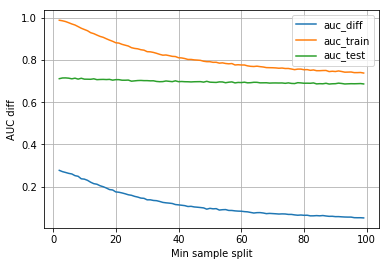

In [20]:
#Plot it
fig,ax = plt.subplots()
ax.plot(rf_min_sample_lim_df2['min_samples_split'],rf_min_sample_lim_df2['auc_diff'])
ax.plot(rf_min_sample_lim_df2['min_samples_split'],rf_min_sample_lim_df2['auc_train'])
ax.plot(rf_min_sample_lim_df2['min_samples_split'],rf_min_sample_lim_df2['auc_test'])
ax.set_xlabel('Min sample split')
ax.set_ylabel('AUC diff')
ax.grid(True)
ax.legend()
plt.show()

In [21]:
#Experiment with max_depth
rf_max_depth_df = pd.DataFrame([])
for i in range(2,20):
    print('\nRUN max_depth={}'.format(i))
    rf_mod = rfc(max_depth=i)
    rf_mod.fit(df_train[feature_cols],df_train[cat_cols])
    print('RUN ON TEST DF')
    pred_signal = rf_mod.predict(df_test[feature_cols])
    rf_max_depth_df = rf_max_depth_df.append(calc_tpr(pred_signal,df_test['signal'],{'max_depth':i,'train_test':'test'},df_test['signal'].unique()))
    print('RUN ON TRAIN DF')
    pred_signal = rf_mod.predict(df_train[feature_cols])
    rf_max_depth_df = rf_max_depth_df.append(calc_tpr(pred_signal,df_train['signal'],{'max_depth':i,'train_test':'train'},df_train['signal'].unique()))
rf_max_depth_df


RUN max_depth=2


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:7065.0000, false_pos:6885.0000, acc:0.6679,ppv:0.5065,npv:0.7156,auc:0.5878
hold -> true_pos:31788.0000, false_pos:15325.0000, acc:0.6878,ppv:0.6747,npv:0.7320,auc:0.6473
buy -> true_pos:0.0000, false_pos:0.0000, acc:0.9169,ppv:0.0000,npv:0.9169,auc:0.5000
RUN ON TRAIN DF
hold -> true_pos:74236.0000, false_pos:35530.0000, acc:0.6886,ppv:0.6763,npv:0.7298,auc:0.6478
sell -> true_pos:16542.0000, false_pos:16173.0000, acc:0.6679,ppv:0.5056,npv:0.7163,auc:0.5882
buy -> true_pos:0.0000, false_pos:0.0000, acc:0.9177,ppv:0.0000,npv:0.9177,auc:0.5000

RUN max_depth=3


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:6663.0000, false_pos:5693.0000, acc:0.6808,ppv:0.5393,npv:0.7167,auc:0.5927
hold -> true_pos:32766.0000, false_pos:15941.0000, acc:0.6937,ppv:0.6727,npv:0.7766,auc:0.6490
buy -> true_pos:0.0000, false_pos:0.0000, acc:0.9169,ppv:0.0000,npv:0.9169,auc:0.5000
RUN ON TRAIN DF
hold -> true_pos:76546.0000, false_pos:36778.0000, acc:0.6961,ppv:0.6755,npv:0.7761,auc:0.6512
sell -> true_pos:15671.0000, false_pos:13486.0000, acc:0.6807,ppv:0.5375,npv:0.7175,auc:0.5932
buy -> true_pos:0.0000, false_pos:0.0000, acc:0.9177,ppv:0.0000,npv:0.9177,auc:0.5000

RUN max_depth=4


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:8427.0000, false_pos:7119.0000, acc:0.6863,ppv:0.5421,npv:0.7356,auc:0.6182
hold -> true_pos:31625.0000, false_pos:13892.0000, acc:0.7086,ppv:0.6948,npv:0.7491,auc:0.6731
buy -> true_pos:0.0000, false_pos:0.0000, acc:0.9169,ppv:0.0000,npv:0.9169,auc:0.5000
RUN ON TRAIN DF
hold -> true_pos:73861.0000, false_pos:32126.0000, acc:0.7099,ppv:0.6969,npv:0.7475,auc:0.6742
sell -> true_pos:19725.0000, false_pos:16769.0000, acc:0.6861,ppv:0.5405,npv:0.7362,auc:0.6184
buy -> true_pos:0.0000, false_pos:0.0000, acc:0.9177,ppv:0.0000,npv:0.9177,auc:0.5000

RUN max_depth=5


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:8042.0000, false_pos:6451.0000, acc:0.6910,ppv:0.5549,npv:0.7333,auc:0.6171
hold -> true_pos:31993.0000, false_pos:14276.0000, acc:0.7084,ppv:0.6915,npv:0.7612,auc:0.6708
buy -> true_pos:188.0000, false_pos:113.0000, acc:0.9181,ppv:0.6246,npv:0.9196,auc:0.5175
RUN ON TRAIN DF
hold -> true_pos:74885.0000, false_pos:32804.0000, acc:0.7123,ppv:0.6954,npv:0.7646,auc:0.6746
sell -> true_pos:19055.0000, false_pos:14976.0000, acc:0.6940,ppv:0.5599,npv:0.7360,auc:0.6208
buy -> true_pos:475.0000, false_pos:286.0000, acc:0.9190,ppv:0.6242,npv:0.9206,auc:0.5192

RUN max_depth=6


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:9141.0000, false_pos:6549.0000, acc:0.7074,ppv:0.5826,npv:0.7505,auc:0.6427
hold -> true_pos:31480.0000, false_pos:13100.0000, acc:0.7192,ppv:0.7061,npv:0.7545,auc:0.6866
buy -> true_pos:469.0000, false_pos:324.0000, acc:0.9193,ppv:0.5914,npv:0.9236,auc:0.5433
RUN ON TRAIN DF
hold -> true_pos:73625.0000, false_pos:30165.0000, acc:0.7220,ppv:0.7094,npv:0.7558,auc:0.6892
sell -> true_pos:21550.0000, false_pos:15342.0000, acc:0.7089,ppv:0.5841,npv:0.7525,auc:0.6451
buy -> true_pos:1085.0000, false_pos:714.0000, acc:0.9203,ppv:0.6031,npv:0.9244,auc:0.5435

RUN max_depth=7


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:9244.0000, false_pos:5958.0000, acc:0.7187,ppv:0.6081,npv:0.7554,auc:0.6525
hold -> true_pos:31563.0000, false_pos:12850.0000, acc:0.7247,ppv:0.7107,npv:0.7620,auc:0.6926
buy -> true_pos:814.0000, false_pos:634.0000, acc:0.9198,ppv:0.5622,npv:0.9285,auc:0.5745
RUN ON TRAIN DF
hold -> true_pos:73959.0000, false_pos:29467.0000, acc:0.7292,ppv:0.7151,npv:0.7666,auc:0.6971
sell -> true_pos:21806.0000, false_pos:13916.0000, acc:0.7207,ppv:0.6104,npv:0.7576,auc:0.6553
buy -> true_pos:1918.0000, false_pos:1415.0000, acc:0.9212,ppv:0.5755,npv:0.9295,auc:0.5764

RUN max_depth=8


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:9460.0000, false_pos:6041.0000, acc:0.7209,ppv:0.6103,npv:0.7585,auc:0.6568
hold -> true_pos:31437.0000, false_pos:12534.0000, acc:0.7278,ppv:0.7149,npv:0.7608,auc:0.6970
buy -> true_pos:924.0000, false_pos:667.0000, acc:0.9211,ppv:0.5808,npv:0.9302,auc:0.5851
RUN ON TRAIN DF
hold -> true_pos:73942.0000, false_pos:28554.0000, acc:0.7355,ppv:0.7214,npv:0.7716,auc:0.7047
sell -> true_pos:22581.0000, false_pos:13680.0000, acc:0.7278,ppv:0.6227,npv:0.7637,auc:0.6646
buy -> true_pos:2260.0000, false_pos:1464.0000, acc:0.9233,ppv:0.6069,npv:0.9318,auc:0.5908

RUN max_depth=9


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:9802.0000, false_pos:6180.0000, acc:0.7242,ppv:0.6133,npv:0.7635,auc:0.6634
hold -> true_pos:31192.0000, false_pos:11902.0000, acc:0.7341,ppv:0.7238,npv:0.7588,auc:0.7060
buy -> true_pos:1127.0000, false_pos:860.0000, acc:0.9213,ppv:0.5672,npv:0.9332,auc:0.6034
RUN ON TRAIN DF
hold -> true_pos:73681.0000, false_pos:26626.0000, acc:0.7472,ppv:0.7346,npv:0.7773,auc:0.7194
sell -> true_pos:23875.0000, false_pos:13668.0000, acc:0.7370,ppv:0.6359,npv:0.7731,auc:0.6783
buy -> true_pos:2836.0000, false_pos:1795.0000, acc:0.9250,ppv:0.6124,npv:0.9355,auc:0.6141

RUN max_depth=10


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:9939.0000, false_pos:6226.0000, acc:0.7257,ppv:0.6148,npv:0.7656,auc:0.6662
hold -> true_pos:31129.0000, false_pos:11660.0000, acc:0.7370,ppv:0.7275,npv:0.7594,auc:0.7098
buy -> true_pos:1227.0000, false_pos:882.0000, acc:0.9225,ppv:0.5818,npv:0.9347,auc:0.6130
RUN ON TRAIN DF
hold -> true_pos:74089.0000, false_pos:25419.0000, acc:0.7585,ppv:0.7446,npv:0.7909,auc:0.7320
sell -> true_pos:24751.0000, false_pos:13052.0000, acc:0.7474,ppv:0.6547,npv:0.7809,auc:0.6907
buy -> true_pos:3390.0000, false_pos:1780.0000, acc:0.9290,ppv:0.6557,npv:0.9393,auc:0.6378

RUN max_depth=11


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:9862.0000, false_pos:5761.0000, acc:0.7321,ppv:0.6312,npv:0.7667,auc:0.6700
hold -> true_pos:31255.0000, false_pos:11708.0000, acc:0.7383,ppv:0.7275,npv:0.7640,auc:0.7107
buy -> true_pos:1414.0000, false_pos:1063.0000, acc:0.9226,ppv:0.5709,npv:0.9375,auc:0.6298
RUN ON TRAIN DF
hold -> true_pos:74991.0000, false_pos:24719.0000, acc:0.7698,ppv:0.7521,npv:0.8110,auc:0.7433
sell -> true_pos:25384.0000, false_pos:11441.0000, acc:0.7632,ppv:0.6893,npv:0.7889,auc:0.7058
buy -> true_pos:4086.0000, false_pos:1860.0000, acc:0.9333,ppv:0.6872,npv:0.9441,auc:0.6671

RUN max_depth=12


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10434.0000, false_pos:6121.0000, acc:0.7355,ppv:0.6303,npv:0.7747,auc:0.6796
hold -> true_pos:30943.0000, false_pos:11042.0000, acc:0.7441,ppv:0.7370,npv:0.7598,auc:0.7193
buy -> true_pos:1447.0000, false_pos:1076.0000, acc:0.9230,ppv:0.5735,npv:0.9380,auc:0.6330
RUN ON TRAIN DF
hold -> true_pos:75453.0000, false_pos:21795.0000, acc:0.7935,ppv:0.7759,npv:0.8315,auc:0.7707
sell -> true_pos:28018.0000, false_pos:10896.0000, acc:0.7855,ppv:0.7200,npv:0.8101,auc:0.7363
buy -> true_pos:4750.0000, false_pos:1569.0000, acc:0.9400,ppv:0.7517,npv:0.9488,auc:0.6966

RUN max_depth=13


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10388.0000, false_pos:5829.0000, acc:0.7396,ppv:0.6406,npv:0.7754,auc:0.6821
hold -> true_pos:31030.0000, false_pos:10934.0000, acc:0.7473,ppv:0.7394,npv:0.7646,auc:0.7226
buy -> true_pos:1624.0000, false_pos:1258.0000, acc:0.9229,ppv:0.5635,npv:0.9407,auc:0.6488
RUN ON TRAIN DF
hold -> true_pos:76745.0000, false_pos:19728.0000, acc:0.8171,ppv:0.7955,npv:0.8624,auc:0.7959
sell -> true_pos:29745.0000, false_pos:8925.0000, acc:0.8115,ppv:0.7692,npv:0.8272,auc:0.7648
buy -> true_pos:5871.0000, false_pos:1467.0000, acc:0.9486,ppv:0.8001,npv:0.9567,auc:0.7448

RUN max_depth=14


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10678.0000, false_pos:5841.0000, acc:0.7441,ppv:0.6464,npv:0.7804,auc:0.6890
hold -> true_pos:30964.0000, false_pos:10709.0000, acc:0.7499,ppv:0.7430,npv:0.7647,auc:0.7261
buy -> true_pos:1660.0000, false_pos:1211.0000, acc:0.9242,ppv:0.5782,npv:0.9413,auc:0.6527
RUN ON TRAIN DF
hold -> true_pos:77193.0000, false_pos:18129.0000, acc:0.8315,ppv:0.8098,npv:0.8753,auc:0.8120
sell -> true_pos:31351.0000, false_pos:8281.0000, acc:0.8273,ppv:0.7911,npv:0.8412,auc:0.7851
buy -> true_pos:6249.0000, false_pos:1278.0000, acc:0.9526,ppv:0.8302,npv:0.9594,auc:0.7616

RUN max_depth=15


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10786.0000, false_pos:6079.0000, acc:0.7420,ppv:0.6395,npv:0.7811,auc:0.6887
hold -> true_pos:30744.0000, false_pos:10410.0000, acc:0.7512,ppv:0.7470,npv:0.7598,auc:0.7289
buy -> true_pos:1729.0000, false_pos:1315.0000, acc:0.9237,ppv:0.5680,npv:0.9423,auc:0.6586
RUN ON TRAIN DF
hold -> true_pos:78466.0000, false_pos:14402.0000, acc:0.8666,ppv:0.8449,npv:0.9071,auc:0.8511
sell -> true_pos:34591.0000, false_pos:6716.0000, acc:0.8610,ppv:0.8374,npv:0.8706,auc:0.8273
buy -> true_pos:7332.0000, false_pos:974.0000, acc:0.9623,ppv:0.8827,npv:0.9673,auc:0.8090

RUN max_depth=16


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:10960.0000, false_pos:6072.0000, acc:0.7450,ppv:0.6435,npv:0.7842,auc:0.6930
hold -> true_pos:30775.0000, false_pos:10297.0000, acc:0.7536,ppv:0.7493,npv:0.7623,auc:0.7315
buy -> true_pos:1704.0000, false_pos:1255.0000, acc:0.9242,ppv:0.5759,npv:0.9420,auc:0.6567
RUN ON TRAIN DF
hold -> true_pos:79741.0000, false_pos:12274.0000, acc:0.8905,ppv:0.8666,npv:0.9340,auc:0.8766
sell -> true_pos:36556.0000, false_pos:4967.0000, acc:0.8870,ppv:0.8804,npv:0.8898,auc:0.8571
buy -> true_pos:8228.0000, false_pos:715.0000, acc:0.9704,ppv:0.9200,npv:0.9738,auc:0.8482

RUN max_depth=17


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11070.0000, false_pos:6098.0000, acc:0.7463,ppv:0.6448,npv:0.7860,auc:0.6954
hold -> true_pos:30670.0000, false_pos:10103.0000, acc:0.7550,ppv:0.7522,npv:0.7607,auc:0.7338
buy -> true_pos:1811.0000, false_pos:1311.0000, acc:0.9251,ppv:0.5801,npv:0.9437,auc:0.6667
RUN ON TRAIN DF
hold -> true_pos:80658.0000, false_pos:10370.0000, acc:0.9103,ppv:0.8861,npv:0.9530,auc:0.8982
sell -> true_pos:38327.0000, false_pos:3696.0000, acc:0.9084,ppv:0.9120,npv:0.9069,auc:0.8824
buy -> true_pos:8969.0000, false_pos:461.0000, acc:0.9774,ppv:0.9511,npv:0.9793,auc:0.8807

RUN max_depth=18


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11331.0000, false_pos:6105.0000, acc:0.7505,ppv:0.6499,npv:0.7907,auc:0.7017
hold -> true_pos:30597.0000, false_pos:9794.0000, acc:0.7589,ppv:0.7575,npv:0.7616,auc:0.7389
buy -> true_pos:1814.0000, false_pos:1422.0000, acc:0.9233,ppv:0.5606,npv:0.9436,auc:0.6660
RUN ON TRAIN DF
hold -> true_pos:81216.0000, false_pos:7909.0000, acc:0.9315,ppv:0.9113,npv:0.9652,auc:0.9223
sell -> true_pos:40501.0000, false_pos:2789.0000, acc:0.9300,ppv:0.9356,npv:0.9276,auc:0.9100
buy -> true_pos:9731.0000, false_pos:335.0000, acc:0.9837,ppv:0.9667,npv:0.9849,auc:0.9137

RUN max_depth=19


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RUN ON TEST DF
sell -> true_pos:11416.0000, false_pos:6004.0000, acc:0.7535,ppv:0.6553,npv:0.7927,auc:0.7050
hold -> true_pos:30595.0000, false_pos:9654.0000, acc:0.7611,ppv:0.7601,npv:0.7631,auc:0.7416
buy -> true_pos:1953.0000, false_pos:1441.0000, acc:0.9253,ppv:0.5754,npv:0.9459,auc:0.6795
RUN ON TRAIN DF
hold -> true_pos:81980.0000, false_pos:5666.0000, acc:0.9526,ppv:0.9354,npv:0.9800,auc:0.9457
sell -> true_pos:42486.0000, false_pos:1681.0000, acc:0.9517,ppv:0.9619,npv:0.9471,auc:0.9366
buy -> true_pos:10441.0000, false_pos:227.0000, acc:0.9894,ppv:0.9787,npv:0.9903,auc:0.9444


,features,feature_count,signal,true_pos,false_pos,true_neg,false_neg,tpr,fpr,acc,ppv,npv,auc
0,"{'max_depth': 2, 'train_test': 'test'}",2,sell,7065,6885,33716,13397,0.345274,0.169577,0.667851,0.506452,0.715641,0.587849
1,"{'max_depth': 2, 'train_test': 'test'}",2,hold,31788,15325,10212,3738,0.894781,0.600110,0.687814,0.674718,0.732043,0.647336
2,"{'max_depth': 2, 'train_test': 'test'}",2,buy,0,0,55988,5075,0.000000,0.000000,0.916889,0.000000,0.916889,0.500000
0,"{'max_depth': 2, 'train_test': 'train'}",2,hold,74236,35530,23877,8838,0.893613,0.598078,0.688604,0.676311,0.729849,0.647768
1,"{'max_depth': 2, 'train_test': 'train'}",2,sell,16542,16173,78625,31141,0.346916,0.170605,0.667928,0.505640,0.716296,0.588156
2,"{'max_depth': 2, 'train_test': 'train'}",2,buy,0,0,130757,11724,0.000000,0.000000,0.917715,0.000000,0.917715,0.500000
0,"{'max_depth': 3, 'train_test': 'test'}",2,sell,6663,5693,34908,13799,0.325628,0.140218,0.680789,0.539252,0.716694,0.592705
1,"{'max_depth': 3, 'train_test': 'test'}",2,hold,32766,15941,9596,2760,0.922310,0.624232,0.693743,0.672716,0.776627,0.649039
2,"{'max_depth': 3, 'train_test': 'test'}",2,buy,0,0,55988,5075,0.000000,0.000000,0.916889,0.000000,0.916889,0.500000
0,"{'max_depth': 3, 'train_test': 'train'}",2,hold,76546,36778,22629,6528,0.921419,0.619085,0.696058,0.675462,0.776109,0.651167


In [22]:
#Separate out train and test
rf_max_depth_df['train_test'] = [x['train_test'] for x in rf_max_depth_df['features']]
rf_max_depth_df['max_depth'] = [x['max_depth'] for x in rf_max_depth_df['features']]
rf_max_depth_df_test = rf_max_depth_df[rf_max_depth_df['train_test'] == 'test'].copy().reset_index()
rf_max_depth_df_train = rf_max_depth_df[rf_max_depth_df['train_test'] == 'train'].copy().reset_index()

In [23]:
#Form into a single dataset
rf_max_depth_df_test.rename(columns={'true_pos':'true_pos_test','false_pos':'false_pos_test','ppv':'ppv_test','auc':'auc_test'},inplace=True)
rf_max_depth_df_train.rename(columns={'true_pos':'true_pos_train','false_pos':'false_pos_train','ppv':'ppv_train','auc':'auc_train'},inplace=True)
rf_max_depth_df_test2 = pd.merge(rf_max_depth_df_train[['max_depth','signal','true_pos_train','false_pos_train','ppv_train','auc_train']],rf_max_depth_df_test[['max_depth','signal','true_pos_test','false_pos_test','ppv_test','auc_test']],left_on=['max_depth','signal'],right_on=['max_depth','signal'])
rf_max_depth_df_test2 = rf_max_depth_df_test2.groupby(['max_depth']).mean().reset_index()
rf_max_depth_df_test2['ppv_diff'] = abs(rf_max_depth_df_test2['ppv_train'] - rf_max_depth_df_test2['ppv_test'])
rf_max_depth_df_test2['auc_diff'] = abs(rf_max_depth_df_test2['auc_train'] - rf_max_depth_df_test2['auc_test'])
rf_max_depth_df_test2.sort_values(['auc_diff'],ascending=True)

,max_depth,true_pos_train,false_pos_train,ppv_train,auc_train,true_pos_test,false_pos_test,ppv_test,auc_test,ppv_diff,auc_diff
0,2,30259.333333,17234.333333,0.393984,0.578641,12951.000000,7403.333333,0.393723,0.578395,0.000260,0.000246
2,4,31195.333333,16298.333333,0.412462,0.597516,13350.666667,7003.666667,0.412288,0.597116,0.000174,0.000401
1,3,30739.000000,16754.666667,0.404310,0.581454,13143.000000,7211.333333,0.403990,0.580581,0.000321,0.000872
4,6,32086.666667,15407.000000,0.632205,0.625946,13696.666667,6657.666667,0.626724,0.624198,0.005481,0.001749
5,7,32561.000000,14932.666667,0.633662,0.642925,13873.666667,6480.666667,0.626968,0.639891,0.006694,0.003034
3,5,31471.666667,16022.000000,0.626497,0.604867,13407.666667,6946.666667,0.623643,0.601780,0.002854,0.003087
6,8,32927.666667,14566.000000,0.650341,0.653375,13940.333333,6414.000000,0.635333,0.646295,0.015008,0.007080
7,9,33464.000000,14029.666667,0.660962,0.670571,14040.333333,6314.000000,0.634772,0.657578,0.026191,0.012994
8,10,34076.666667,13417.000000,0.684999,0.686816,14098.333333,6256.000000,0.641380,0.663007,0.043619,0.023808
9,11,34820.333333,12673.333333,0.709530,0.705426,14177.000000,6177.333333,0.643196,0.670169,0.066334,0.035257


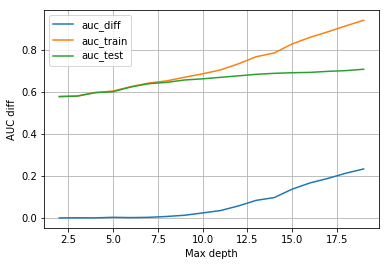

In [24]:
#Plot it
fig,ax = plt.subplots()
ax.plot(rf_max_depth_df_test2['max_depth'],rf_max_depth_df_test2['auc_diff'])
ax.plot(rf_max_depth_df_test2['max_depth'],rf_max_depth_df_test2['auc_train'])
ax.plot(rf_max_depth_df_test2['max_depth'],rf_max_depth_df_test2['auc_test'])
ax.set_xlabel('Max depth')
ax.set_ylabel('AUC diff')
ax.grid(True)
ax.legend()
plt.show()

I choose to use:
- Min sample split -> 60
- Max depth -> 9

# Train the final model

In [25]:
final_models = rfc(min_samples_split=60,max_depth=9)
final_models.fit(df_model_rand[feature_cols],df_model_rand[cat_cols])

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
pred_signal = final_models.predict(df_test[feature_cols])
calc_tpr(pred_signal,df_test['signal'],['FINAL RF MODEL'],df_test['signal'].unique())    

sell -> true_pos:9875.0000, false_pos:5690.0000, acc:0.7334,ppv:0.6344,npv:0.7673,auc:0.6712
hold -> true_pos:31637.0000, false_pos:11967.0000, acc:0.7403,ppv:0.7256,npv:0.7772,auc:0.7110
buy -> true_pos:1172.0000, false_pos:722.0000, acc:0.9243,ppv:0.6188,npv:0.9340,auc:0.6090


,features,feature_count,signal,true_pos,false_pos,true_neg,false_neg,tpr,fpr,acc,ppv,npv,auc
0,[FINAL RF MODEL],1,sell,9875,5690,34911,10587,0.482602,0.140144,0.733439,0.634436,0.767308,0.671229
1,[FINAL RF MODEL],1,hold,31637,11967,13570,3889,0.890531,0.468614,0.740334,0.725553,0.777250,0.710958
2,[FINAL RF MODEL],1,buy,1172,722,55266,3903,0.230936,0.012896,0.924259,0.618796,0.934036,0.609020


# Exporting the model

In [27]:
#Import the modules
from sklearn.externals import joblib as jl

In [28]:
#Export the model
jl.dump(final_models,path+r'random_forest_model.joblib')

['C:\\Users\\Robert\\Documents\\python_scripts\\stock_trading_ml_modelling\\historical_prices\\random_forest_model.joblib']

In [29]:
#Export a list of the features for this model
file_object = open(path+r'random_forest_model_feature_list.txt','w')
feature_str = ''
for i in feature_cols:
    feature_str += '{},'.format(i)
feature_str = feature_str[:-1]
file_object.write(feature_str)
file_object.close()
feature_str

'open,close,high,low,volume,change_price,per_change_price,close_shift1,change_close_shift1,vol_shift1,change_vol_shift1,ema26_shift1,change_ema26_shift1,close_13_norm,close_26_norm,close_52_norm,macd_line_13_norm,macd_line_26_norm,macd_line_52_norm,macd_pos_val,macd_neg_val,signal_line_pos_val,signal_line_neg_val,change_price_pos_val,change_price_neg_val,per_change_price_pos_val,per_change_price_neg_val,prev_max_close,prev_min_close,prev_max_close_date_change,prev_min_close_date_change,max_change_close_pos_val,max_change_close_neg_val,min_change_close_pos_val,min_change_close_neg_val,prev_max_macd,prev_min_macd,prev_max_macd_date_change,prev_min_macd_date_change,max_change_macd_pos_val,max_change_macd_neg_val,min_change_macd_pos_val,min_change_macd_neg_val,prev_max_ema26,prev_min_ema26,prev_max_ema26_date_change,prev_min_ema26_date_change,max_change_ema26_pos_val,max_change_ema26_neg_val,min_change_ema26_pos_val,min_change_ema26_neg_val,prev_max_signal_line,prev_min_signal_line,prev_ma